# data 가져오기

In [ ]:
#내 드라이브 접속
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

# 파일 경로 지정
file_path = '/content/drive/My Drive/project3/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# CSV 파일을 데이터프레임으로 읽기
df = pd.read_csv(file_path)

# 데이터프레임의 상위 5개 행을 출력
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4         

In [ ]:
# 컬럼 이름과 컬럼 개수 출력
print("컬럼 이름들:", df.columns.tolist())
print("컬럼 개수:", len(df.columns))

컬럼 이름들: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
컬럼 개수: 21


In [ ]:
df.isnull().sum()  # -> 결측치 없음

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
import numpy as np

In [ ]:
df['TotalCharges'].iloc[488,]      #488행에 "  " 블랭크 칸있음
df['TotalCharges'].replace(' ', np.nan, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])   #오브젝트형이라 숫자형으로 바꿔줌, 숫자형으로 바꿔주니 결측치 11개 나옴

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [ ]:
# 수치형 변수를 선택 , 3개
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns.columns.tolist())

['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# 문자형 변수를 선택 , 18 개
categorical_columns = df.select_dtypes(include=['object'])

# 문자형 변수의 컬럼 이름과 개수 출력
print(f"문자형 변수 컬럼 이름들:{categorical_columns.columns.tolist()}")

문자형 변수 컬럼 이름들:['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
categorical_columns.columns, len(categorical_columns.columns)

(Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn'],
       dtype='object'),
 18)

In [ ]:
df['TotalCharges'].isnull().sum()

11

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# 컬럼 소문자로 바꾸기

In [ ]:
# 컬럼명을 소문자로 변경
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

# 데이터 8:2 나누기

In [ ]:
from sklearn.model_selection import train_test_split

# X와 y 설정
x = df.drop(columns=['churn'])  # 독립 변수
y = df['churn']  # 종속 변수

# 데이터 분할 (2:8 비율)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 결과 확인
print(f'Train set size: {x_train.shape[0]}')
print(f'Test set size: {x_test.shape[0]}')

Train set size: 5634
Test set size: 1409


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))

# 데이터 확인해보기

In [ ]:
train_set = pd.concat([x_train, y_train], axis=1)
test_set = pd.concat([x_test, y_test], axis=1)

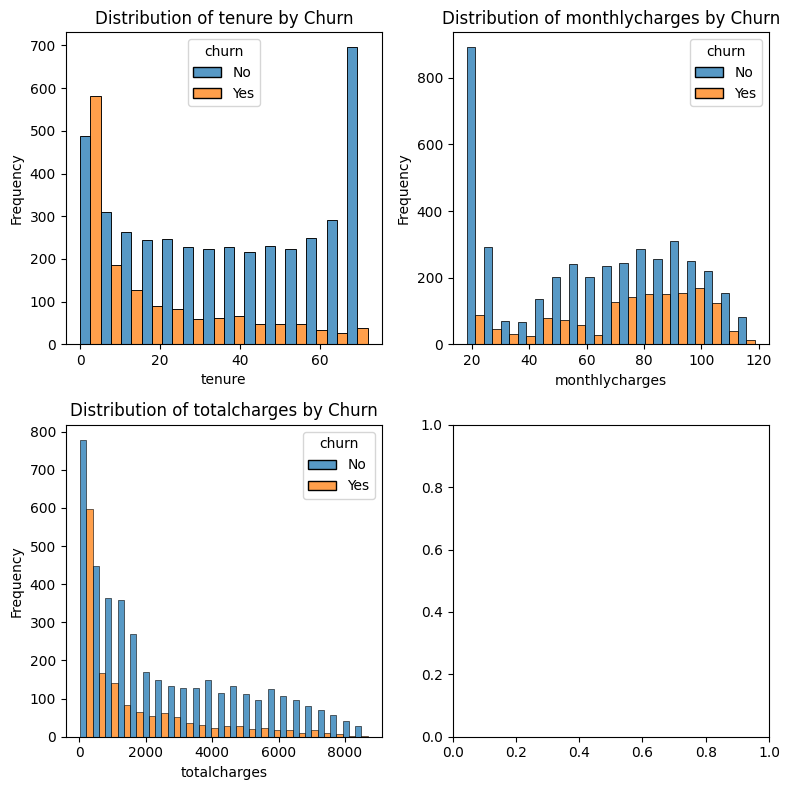

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

#numeric_columns 소문자로 바꾸기
numeric_columns = [col.lower() for col in numeric_columns]

# 각 수치형 변수에 대해 그래프 생성
for i, column in enumerate(numeric_columns):
    # 히스토그램을 서브플롯에 그리기
    sns.histplot(data=train_set, x=column, hue='churn', multiple='dodge', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {column} by Churn')
    axes[i // 2, i % 2].set_xlabel(column)
    axes[i // 2, i % 2].set_ylabel('Frequency')

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

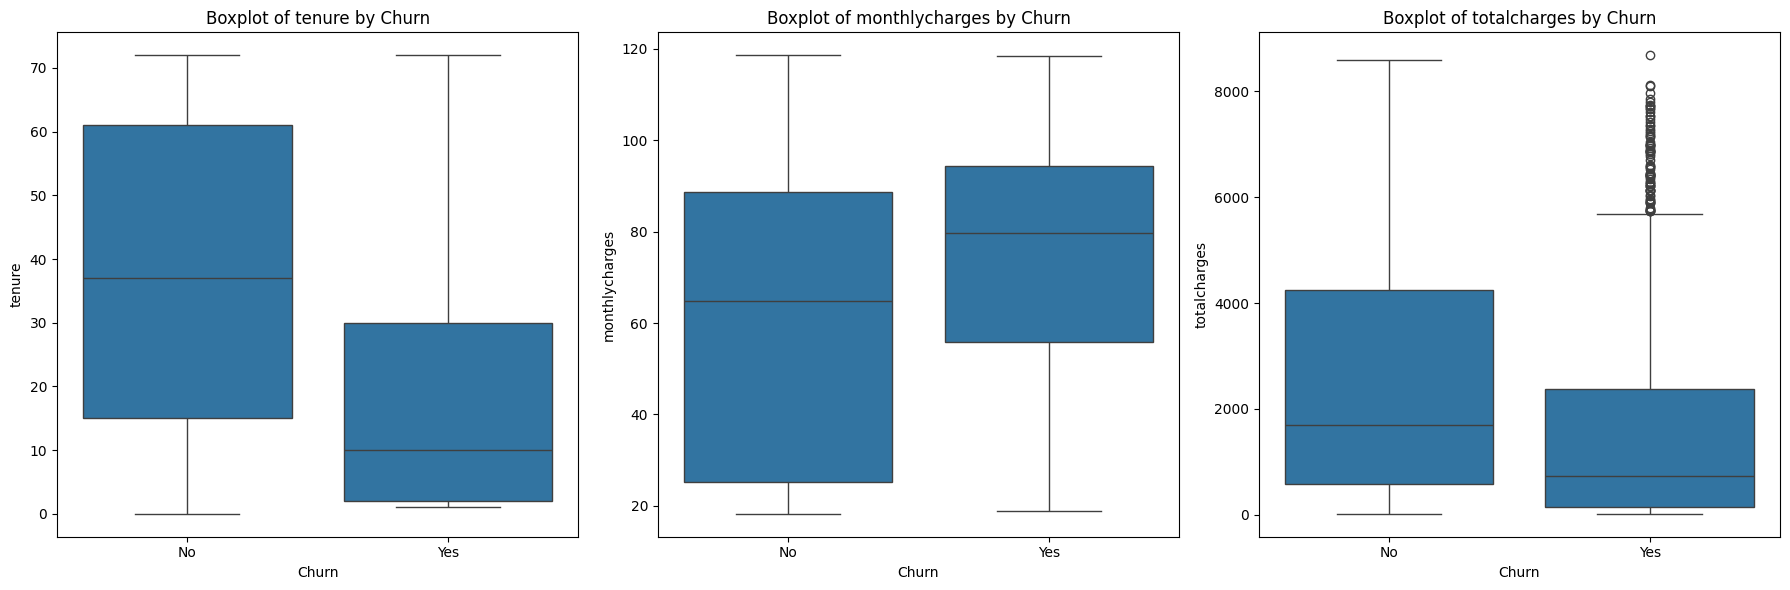

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성 (3개 변수를 위한 1행 3열)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


# 각 수치형 변수에 대해 박스플롯 생성
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=train_set, x='churn', y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(column)

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

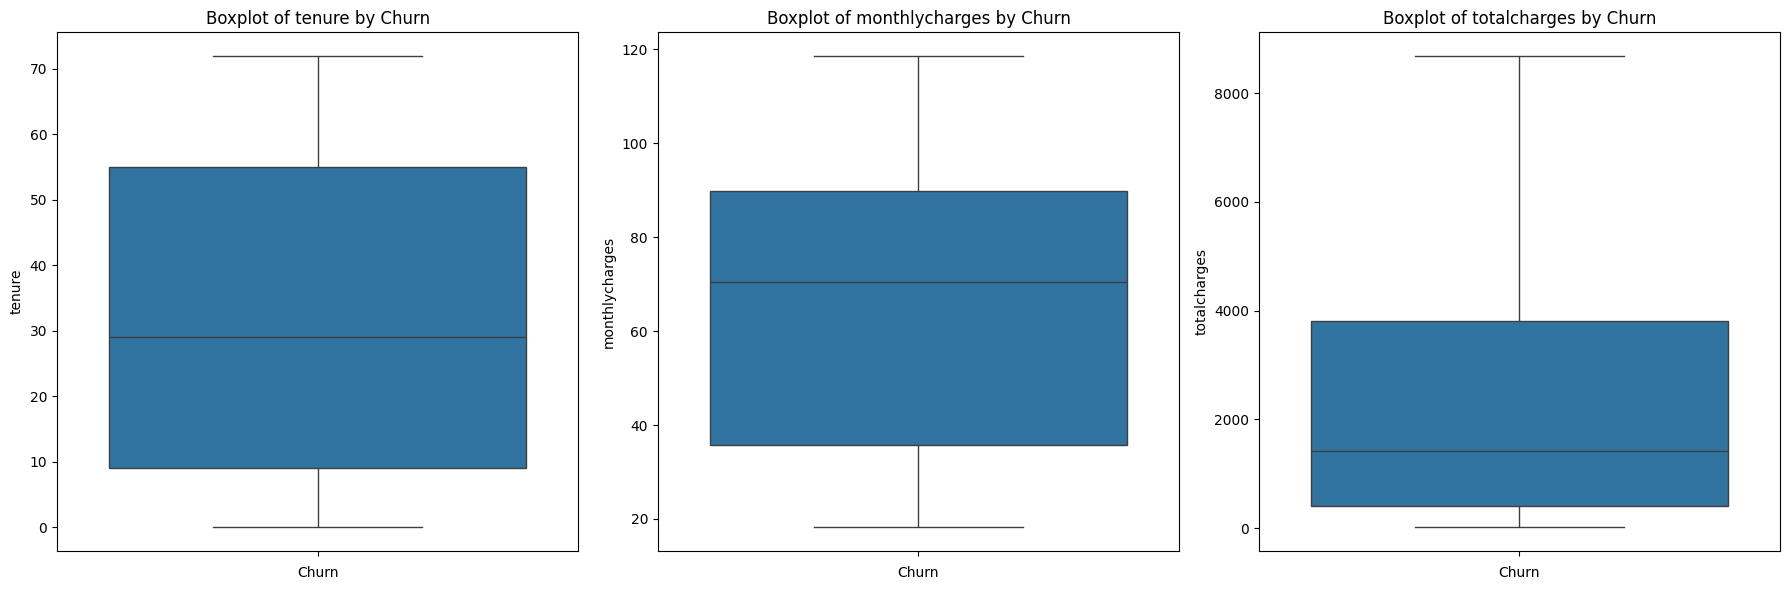

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성 (3개 변수를 위한 1행 3열)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 각 수치형 변수에 대해 박스플롯 생성
for i, column in enumerate(numeric_columns):
    # 박스플롯 그리기 (hue 없이)
    sns.boxplot(data=train_set, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(column)

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()


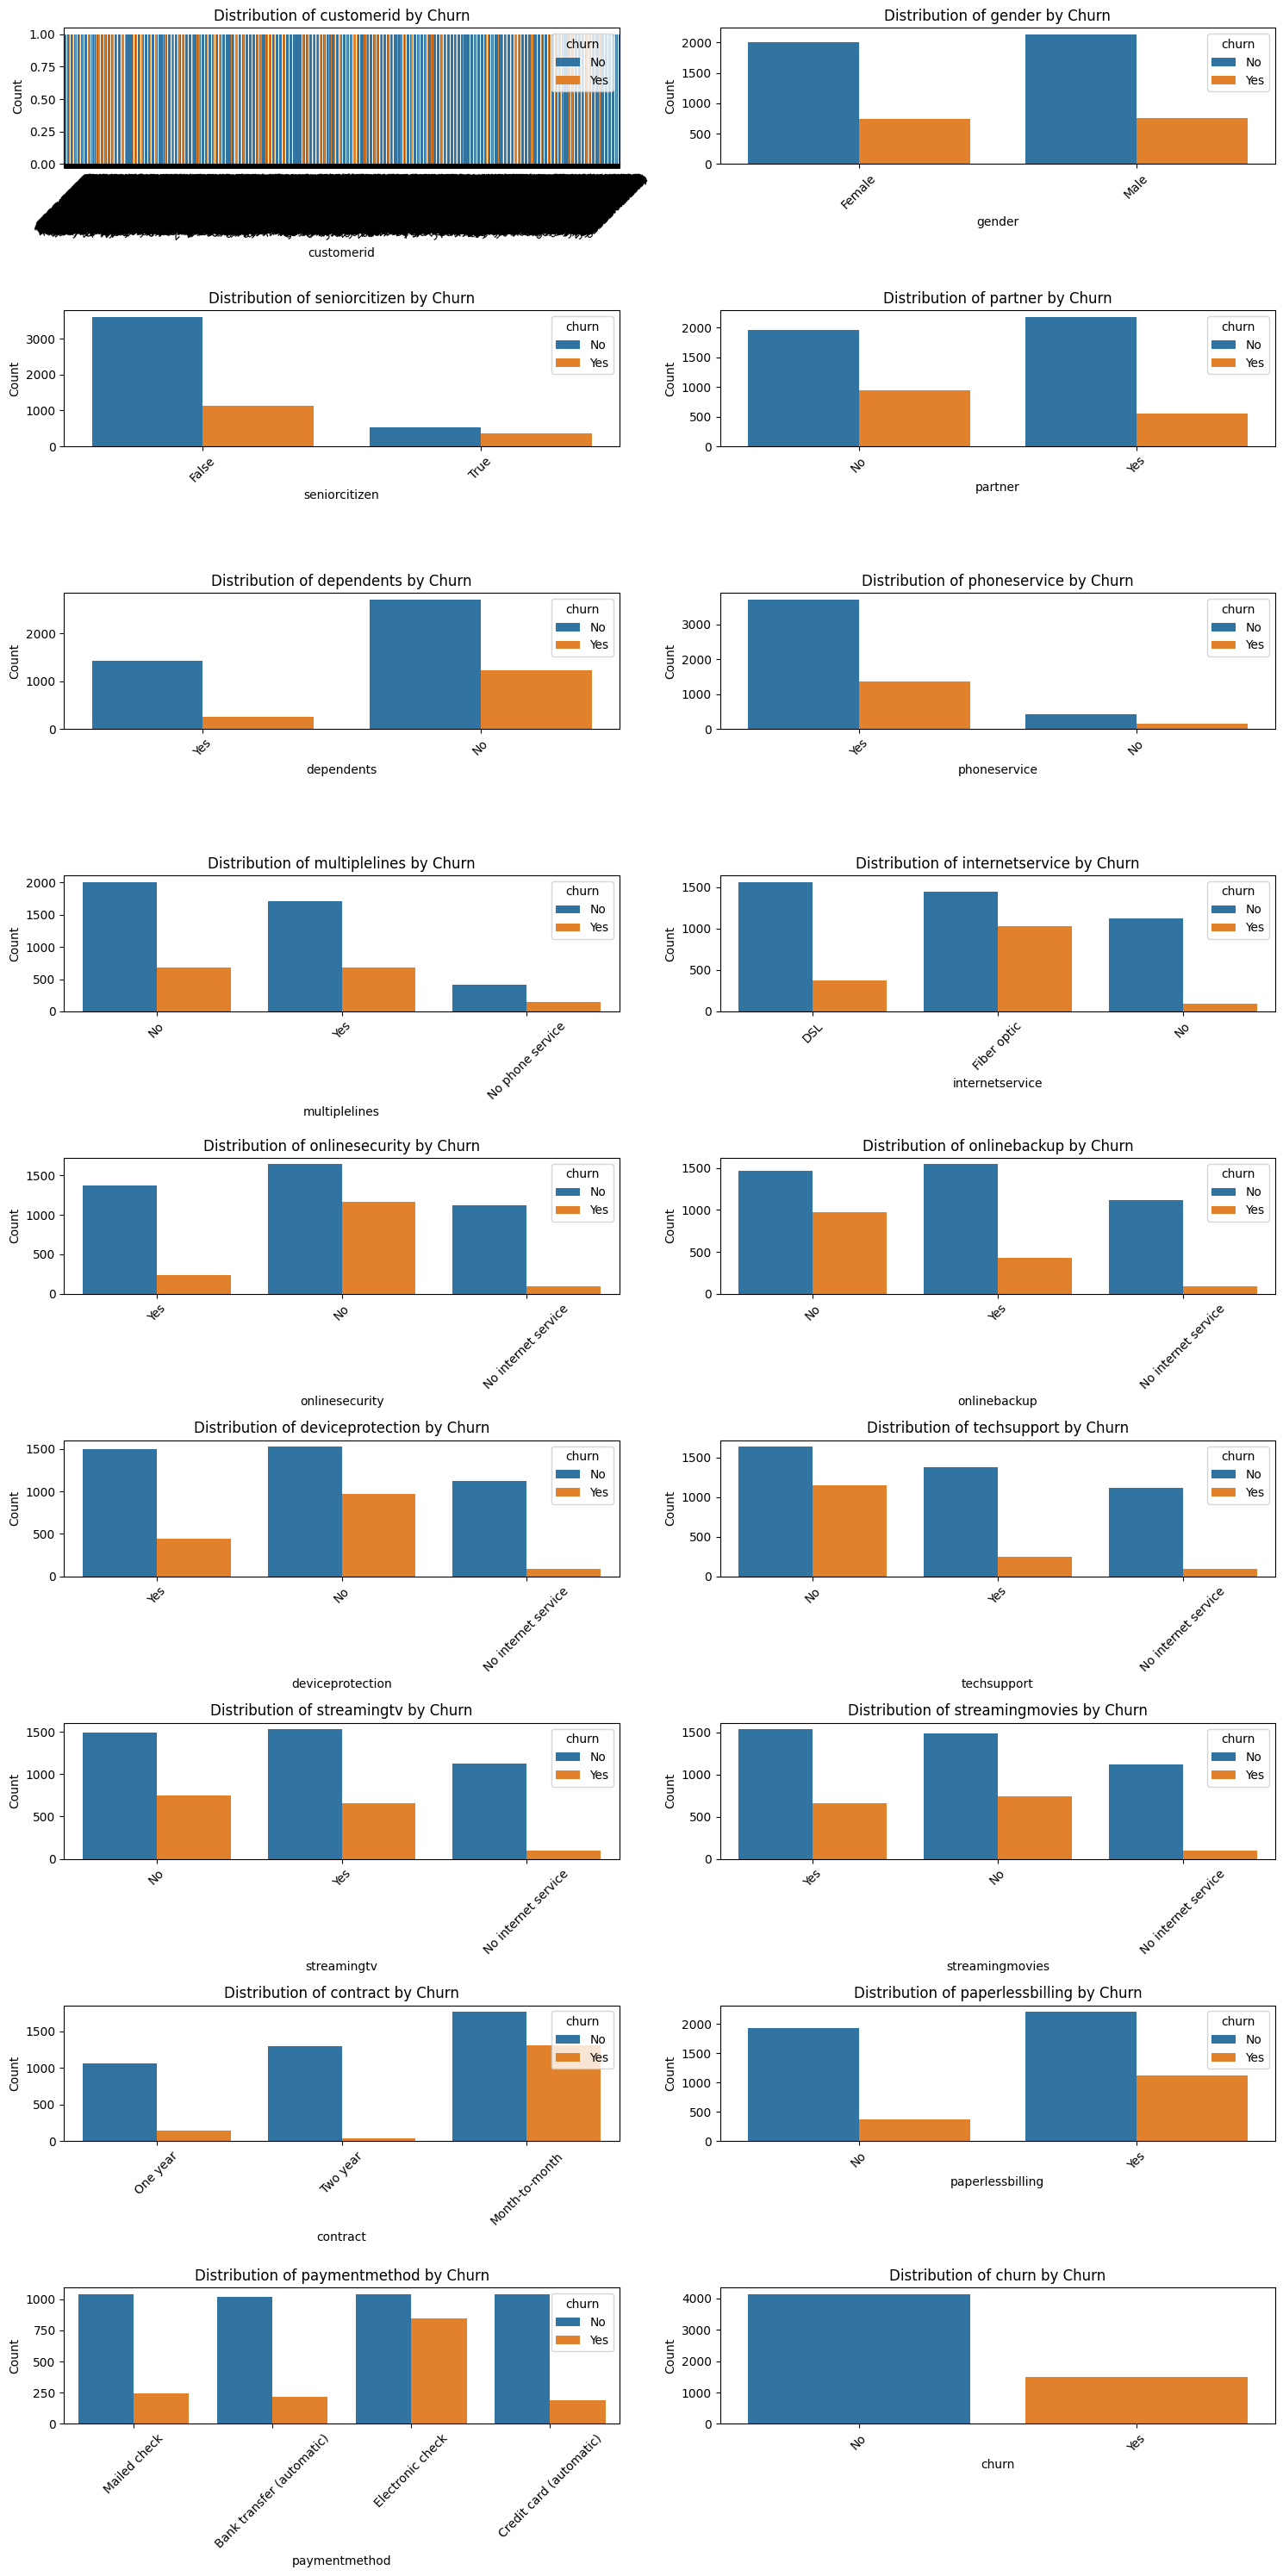

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15,30))

# 그래프의 축을 1차원 배열로 변환
axes = axes.flatten()


#카테고리 소문자 변환
categorical_columns = [col.lower() for col in categorical_columns]

# 각 명목형 변수에 대해 그래프 생성
for i, column in enumerate(categorical_columns):
    sns.countplot(data=train_set, x=column, hue='churn', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # X축 레이블 회전 (긴 레이블을 위해)

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
columns_to_drop = ['customerid']

# 데이터프레임에서 해당 컬럼 제거
x_train.drop(columns=columns_to_drop, inplace=True)
x_test.drop(columns=columns_to_drop, inplace=True)

# 피처추가

In [ ]:
# totalcharges 결측치 평균으로 대체
x_train['totalcharges'].fillna( train_set['totalcharges'].mean(), inplace=True)
x_test['totalcharges'].fillna( test_set['totalcharges'].mean(), inplace=True)


# totalcharges 이상치들

In [ ]:
train_set.loc[train_set['churn']=='Yes','totalcharges'] #아까 그래프에서 찾아봤을 때, 종속변수가 1일 때 q3값이 굉장히 낮게 위치했었음

q1_value_totalcharges = train_set.loc[train_set['churn'] == 'Yes', 'totalcharges'].quantile(0.25)

q3_value_tenure = train_set.loc[train_set['churn'] == 'Yes', 'tenure'].quantile(0.75)


In [ ]:
q1_value_totalcharges
q3_value_tenure


30.0

In [ ]:
train_set['low_q1_total'] = q1_value_totalcharges >= train_set['totalcharges']
test_set['low_q1_total'] = q1_value_totalcharges >= test_set['totalcharges']

train_set['low_q3_tenure'] = q3_value_tenure >= train_set['tenure']
test_set['low_q3_tenure'] = q3_value_tenure >= test_set['tenure']



In [ ]:
 x_train['low_q1_total']=train_set['low_q1_total']
 x_test['low_q1_total'] = test_set['low_q1_total']

 x_train['low_q3_tenure']=train_set['low_q3_tenure']
 x_test['low_q3_tenure'] = test_set['low_q3_tenure']


In [ ]:
# 'partner'가 'No'이고 'dependents'도 'No'인 경우를 1로 설정
x_train['partner+dependents_no'] = ((x_train['partner'] == 'No') & (x_train['dependents'] == 'No')).astype(int)
x_test['partner+dependents_no'] = ((x_test['partner'] == 'No') & (x_test['dependents'] == 'No')).astype(int)

In [ ]:
# 'partner'가 'No'이고 'dependents'도 'No'인 경우를 1로 설정
x_train['partner+dependents_no'] = ((x_train['partner'] == 'No') & (x_train['dependents'] == 'No')).astype(int)
x_test['partner+dependents_no'] = ((x_test['partner'] == 'No') & (x_test['dependents'] == 'No')).astype(int)

In [ ]:
x_train['total_charges_binary_1500'] = (x_train['totalcharges'] < 1500).astype(int)
x_test['total_charges_binary_1500'] = (x_test['totalcharges'] < 1500).astype(int)

In [ ]:
# 계약 종료 임박 여부를 나타내는 변수 생성
def create_contract_end_soon_feature(data):
    data['contract_end_soon'] = 0  # 기본값 0으로 설정
    # 계약 유형별로 종료 임박 여부 설정
    data.loc[(data['contract'] == 'One year') & (data['tenure'] >= 11), 'contract_end_soon'] = 1
    data.loc[(data['contract'] == 'Two year') & (data['tenure'] >= 23), 'contract_end_soon'] = 1
    # Month-to-Month 계약은 기본적으로 종료 임박으로 설정
    data.loc[data['contract'] == 'Month-to-month', 'contract_end_soon'] = 1
    return data

# x_train과 x_test에 적용
x_train = create_contract_end_soon_feature(x_train)
x_test = create_contract_end_soon_feature(x_test)

# 결과 확인
print(x_train['contract_end_soon'].value_counts())
print(x_test['contract_end_soon'].value_counts())


contract_end_soon
1    5454
0     180
Name: count, dtype: int64
contract_end_soon
1    1371
0      38
Name: count, dtype: int64


In [ ]:
import numpy as np

# 청구 금액 비율 계산 (0으로 나누기 방지)
x_train['billing_ratio'] = x_train.apply(
    lambda row: row['totalcharges'] / (row['monthlycharges'] * row['tenure']) if row['monthlycharges'] > 0 and row['tenure'] > 0 else 0,
    axis=1
)

x_test['billing_ratio'] = x_test.apply(
    lambda row: row['totalcharges'] / (row['monthlycharges'] * row['tenure']) if row['monthlycharges'] > 0 and row['tenure'] > 0 else 0,
    axis=1
)

# 무한대 및 NaN 값 처리
x_train['billing_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
x_train['billing_ratio'].fillna(0, inplace=True)

x_test['billing_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
x_test['billing_ratio'].fillna(0, inplace=True)

# 결과 확인
print(x_train['billing_ratio'].describe())
print(x_test['billing_ratio'].describe())


count    5634.000000
mean        0.998299
std         0.065231
min         0.000000
25%         0.979551
50%         1.000000
75%         1.019757
max         1.530934
Name: billing_ratio, dtype: float64
count    1409.000000
mean        1.000365
std         0.062023
min         0.000000
25%         0.978928
50%         1.000000
75%         1.018308
max         1.573454
Name: billing_ratio, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# 월별 요금 구간 생성
def categorize_monthly_charges(charges):
    if charges < 30:
        return 'Low'
    elif 30 <= charges < 70:
        return 'Medium'
    else:
        return 'High'

# 계약 기간 구간 생성
def categorize_tenure(tenure):
    if tenure < 12:
        return 'Short-term'
    elif 12 <= tenure < 36:
        return 'Medium-term'
    else:
        return 'Long-term'

# 구간 피처 생성
x_train['monthly_charges_category'] = x_train['monthlycharges'].apply(categorize_monthly_charges)
x_test['monthly_charges_category'] = x_test['monthlycharges'].apply(categorize_monthly_charges)

x_train['tenure_category'] = x_train['tenure'].apply(categorize_tenure)
x_test['tenure_category'] = x_test['tenure'].apply(categorize_tenure)


# 결과 확인
print(x_train[['monthlycharges', 'monthly_charges_category', 'tenure', 'tenure_category']].head())


      monthlycharges monthly_charges_category  tenure tenure_category
2142           64.85                   Medium      21     Medium-term
1623           97.20                     High      54       Long-term
6074           23.45                      Low       1      Short-term
1362           70.20                     High       4      Short-term
6754           61.90                   Medium       0      Short-term


In [ ]:
train_set = pd.concat([x_train, y_train], axis=1)
test_set = pd.concat([x_test, y_test], axis=1)

# 만든 피처 그래프

In [ ]:
f_columns = ['low_q1_total','low_q3_tenure', 'partner+dependents_no','contract_end_soon','billing_ratio','monthly_charges_category','tenure_category','total_charges_binary_1500']

In [ ]:
len(f_columns)

8

In [ ]:
print(train_set.columns)


Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'low_q1_total', 'low_q3_tenure',
       'partner+dependents_no', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'monthly_charges_category',
       'tenure_category', 'churn'],
      dtype='object')


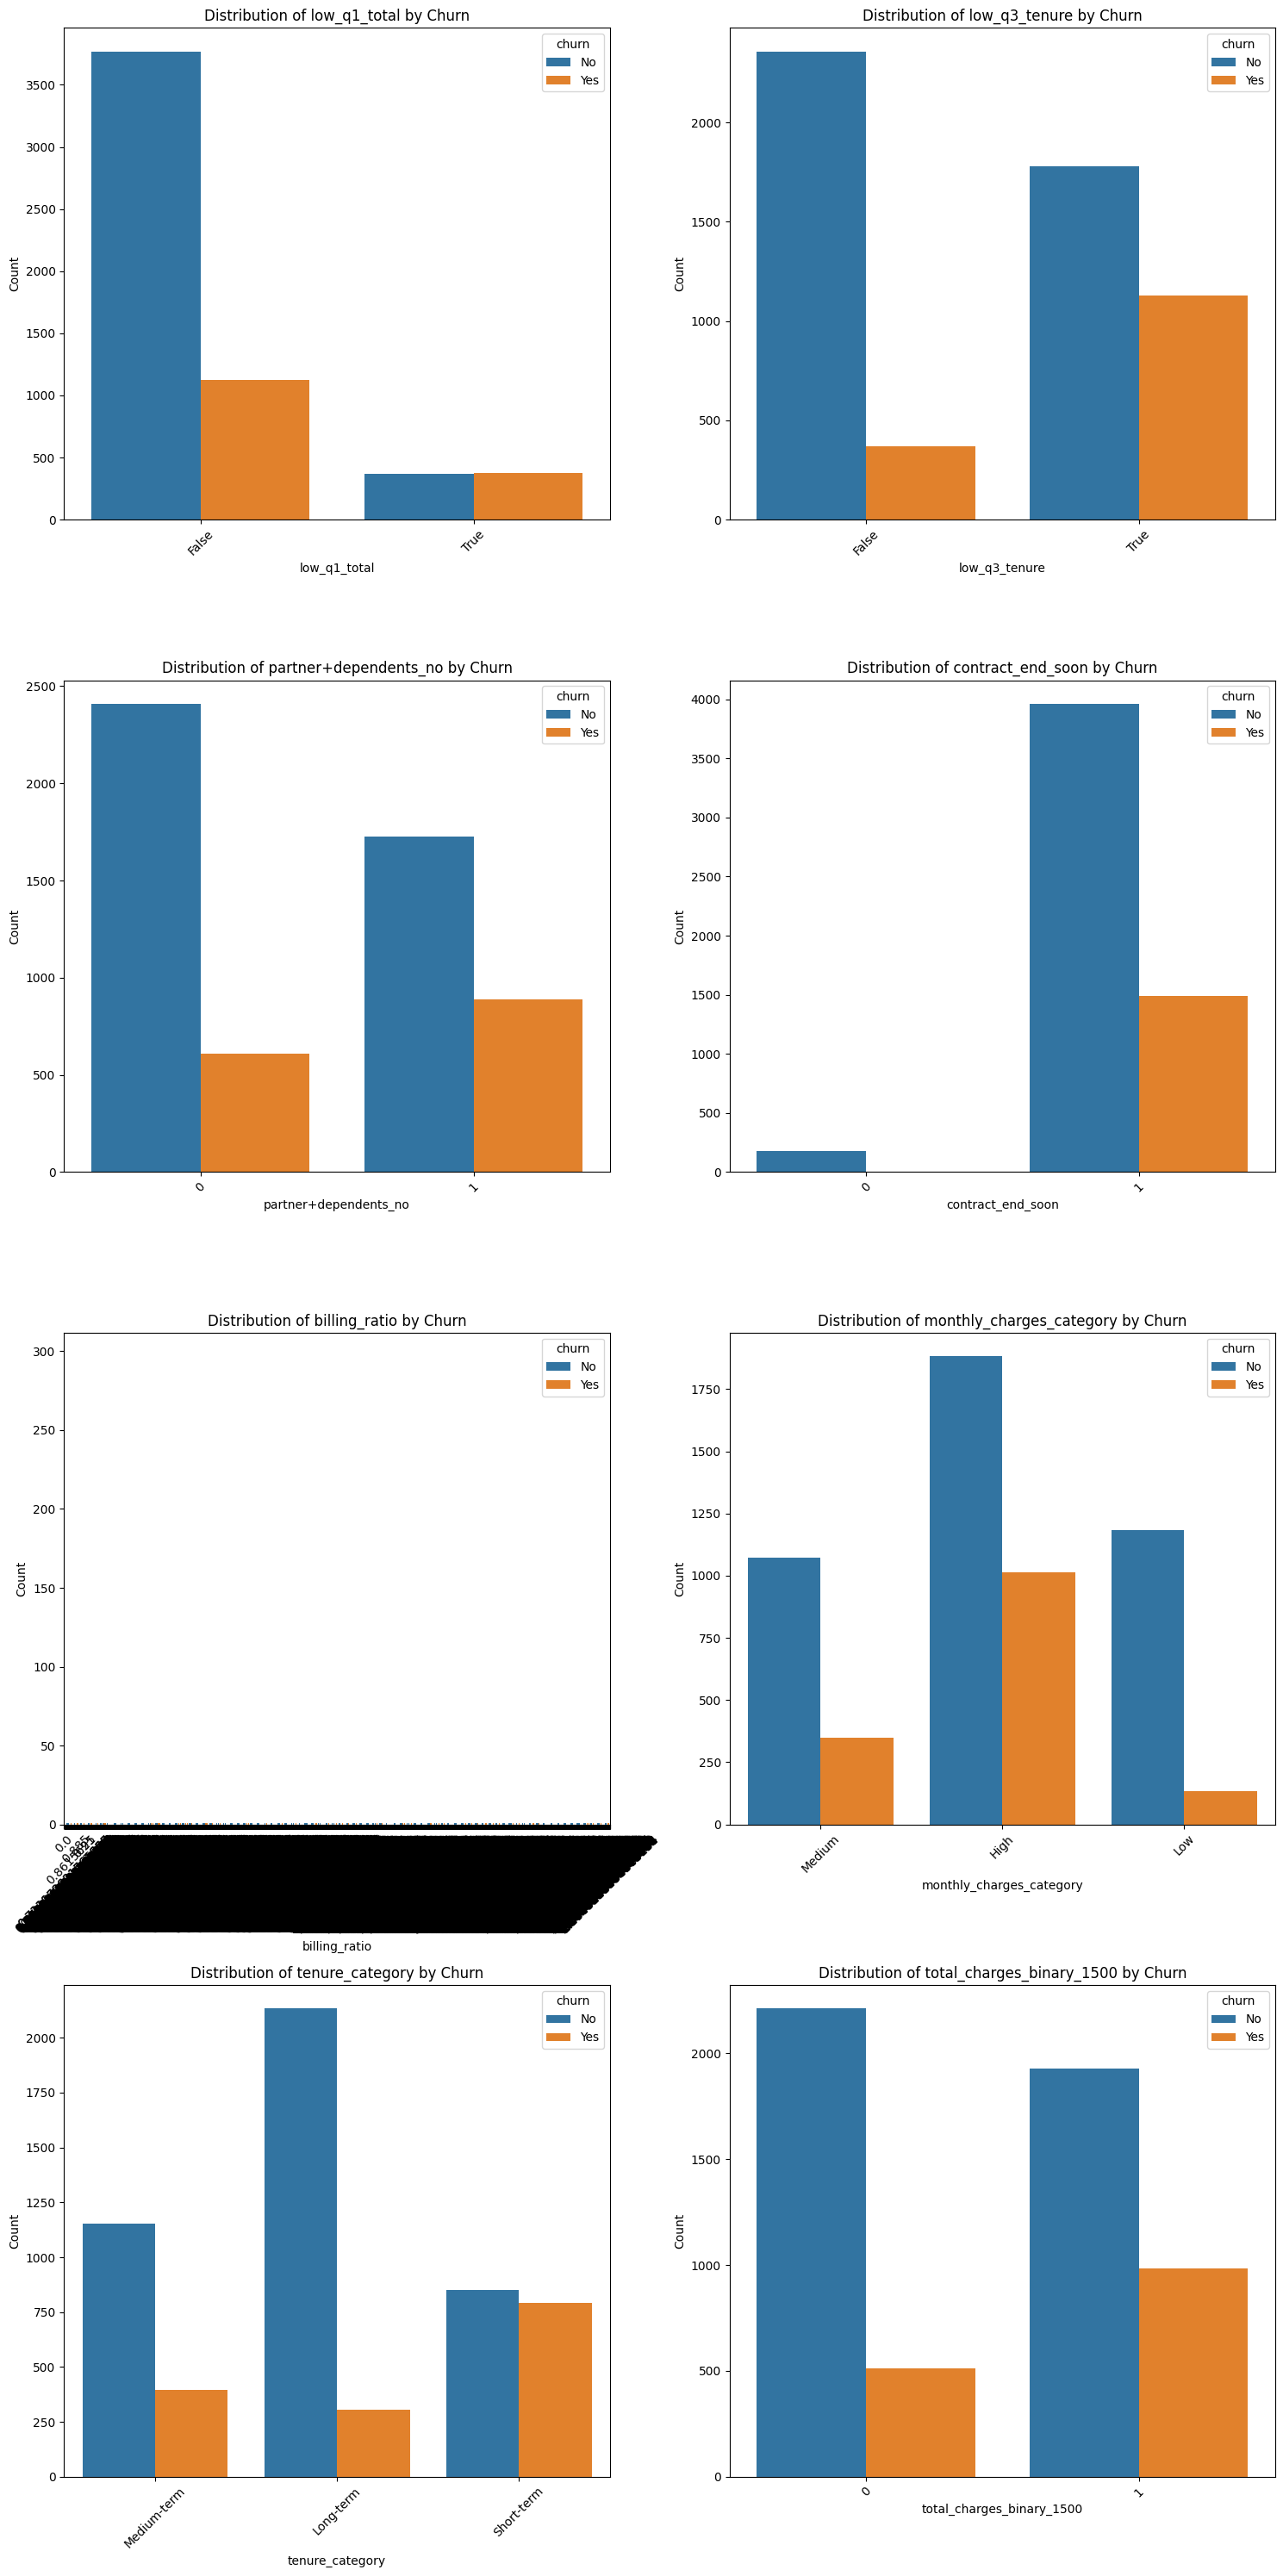

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,30))

# 그래프의 축을 1차원 배열로 변환
axes = axes.flatten()



#카테고리 소문자 변환
categorical_columns = [col.lower() for col in f_columns]

# 각 명목형 변수에 대해 그래프 생성
for i, column in enumerate(f_columns):
    sns.countplot(data=train_set, x=column, hue='churn', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # X축 레이블 회전 (긴 레이블을 위해)

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
x_train['billing_ratio']

2142    0.981606
1623    0.977261
6074    1.000000
1362    0.847400
6754    0.000000
          ...   
3772    1.000000
5191    1.049158
5226    1.205871
5390    1.005656
860     0.888306
Name: billing_ratio, Length: 5634, dtype: float64

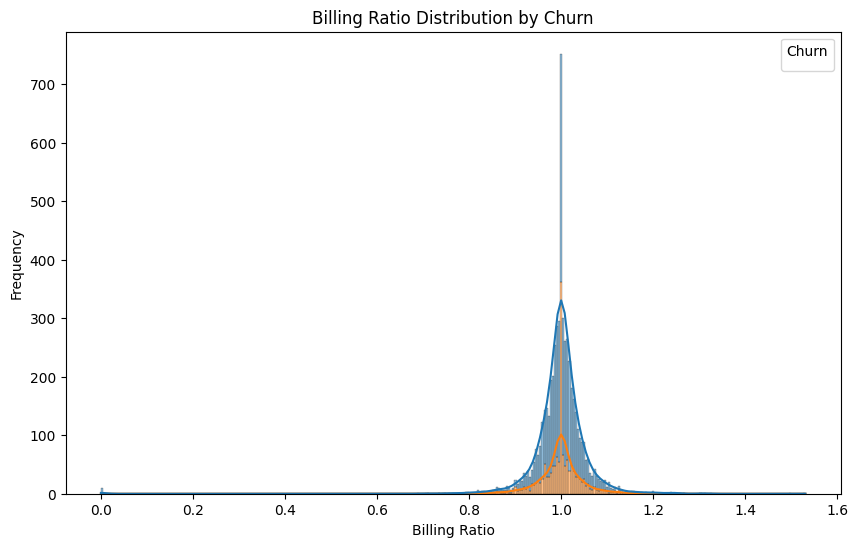

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=train_set, x='billing_ratio', hue='churn', multiple='stack', kde=True)
plt.title('Billing Ratio Distribution by Churn')
plt.xlabel('Billing Ratio')
plt.ylabel('Frequency')
plt.legend(title='Churn')
plt.show()


# 이진변수는 0과1로
다범주변수는 원핫인코딩으로

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     5634 non-null   object 
 1   seniorcitizen              5634 non-null   object 
 2   partner                    5634 non-null   object 
 3   dependents                 5634 non-null   object 
 4   tenure                     5634 non-null   int64  
 5   phoneservice               5634 non-null   object 
 6   multiplelines              5634 non-null   object 
 7   internetservice            5634 non-null   object 
 8   onlinesecurity             5634 non-null   object 
 9   onlinebackup               5634 non-null   object 
 10  deviceprotection           5634 non-null   object 
 11  techsupport                5634 non-null   object 
 12  streamingtv                5634 non-null   object 
 13  streamingmovies            5634 non-null   object 


In [ ]:
def unique_value_summary(df):
    # 유니크한 값의 개수를 세기
    unique_counts = df.nunique()

    # 유니크한 값이 두 개인 열 찾기
    two_unique_cols = unique_counts[unique_counts == 2].index.tolist()

    return two_unique_cols, df[two_unique_cols].nunique()


In [ ]:
# 사용 예
two_unique_columns, unique_counts = unique_value_summary(x_train)
print("Unique columns with two unique values:", two_unique_columns)
print("Counts of unique values in those columns:\n", unique_counts)

Unique columns with two unique values: ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'low_q1_total', 'low_q3_tenure', 'partner+dependents_no', 'total_charges_binary_1500', 'contract_end_soon']
Counts of unique values in those columns:
 gender                       2
seniorcitizen                2
partner                      2
dependents                   2
phoneservice                 2
paperlessbilling             2
low_q1_total                 2
low_q3_tenure                2
partner+dependents_no        2
total_charges_binary_1500    2
contract_end_soon            2
dtype: int64


In [ ]:
x_train[two_unique_columns]

gender seniorcitizen partner dependents phoneservice paperlessbilling  \
2142  Female         False      No        Yes          Yes               No   
1623  Female         False      No         No          Yes              Yes   
6074    Male         False     Yes         No           No              Yes   
1362    Male         False      No         No          Yes              Yes   
6754    Male         False      No        Yes          Yes              Yes   
...      ...           ...     ...        ...          ...              ...   
3772    Male         False     Yes         No          Yes              Yes   
5191  Female         False     Yes        Yes          Yes              Yes   
5226    Male         False     Yes        Yes          Yes              Yes   
5390    Male          True      No         No          Yes              Yes   
860     Male         False      No         No          Yes               No   

      low_q1_total  low_q3_tenure  partner+dependents_no  \
2142         False           True                      0   
1623         False          False                      1   
6074          True           True                      0   
1362         False           True                      1   
6754         False           True                      0   
...            ...            ...                    ...   
3772          True           True                      0   
5191         False           True                      0   
5226         False           True                      0   
5390         False           True                      1   
860          False           True                      1   

      total_charges_binary_1500  contract_end_soon  
2142                          1                  1  
1623                          0                  1  
6074                          1                  1  
1362                          1                  1  
6754                          0                  0  
...                         ...                ...  
3772                          1                  1  
5191                          0                  1  
5226                          1                  1  
5390                          1                  1  
860                           1                  1  

[5634 rows x 11 columns]

In [ ]:
# 변환 적용
binary_columns = ['gender', 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'seniorcitizen', 'partner+dependents_no', 'contract_end_soon', 'low_q1_total', 'low_q3_tenure','total_charges_binary_1500']

for column in binary_columns:
    x_train[column] = x_train[column].apply(lambda x: 1 if x in ['Yes', True, 1,'Male'] else 0)
    x_test[column] = x_test[column].apply(lambda x: 1 if x in ['Yes', True, 1,'Male'] else 0)

# 결과 확인
print(x_train[binary_columns].head())
print(x_test[binary_columns].head())

      gender  partner  dependents  phoneservice  paperlessbilling  \
2142       0        0           1             1                 0   
1623       0        0           0             1                 1   
6074       1        1           0             0                 1   
1362       1        0           0             1                 1   
6754       1        0           1             1                 1   

      seniorcitizen  partner+dependents_no  contract_end_soon  low_q1_total  \
2142              0                      0                  1             0   
1623              0                      1                  1             0   
6074              0                      0                  1             1   
1362              0                      1                  1             0   
6754              0                      0                  0             0   

      low_q3_tenure  total_charges_binary_1500  
2142              1                          1  
1623        

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 1. object 타입인 열 선택
object_columns = x_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
x_train[object_columns]

multiplelines internetservice       onlinesecurity  \
2142                No             DSL                  Yes   
1623               Yes     Fiber optic                   No   
6074  No phone service             DSL                   No   
1362                No     Fiber optic                   No   
6754               Yes             DSL                  Yes   
...                ...             ...                  ...   
3772                No     Fiber optic                  Yes   
5191               Yes             DSL                  Yes   
5226                No              No  No internet service   
5390               Yes     Fiber optic                   No   
860                 No              No  No internet service   

             onlinebackup     deviceprotection          techsupport  \
2142                   No                  Yes                   No   
1623                  Yes                   No                   No   
6074                   No                   No                   No   
1362                   No                   No                   No   
6754                  Yes                   No                  Yes   
...                   ...                  ...                  ...   
3772                   No                   No                   No   
5191                  Yes                  Yes                  Yes   
5226  No internet service  No internet service  No internet service   
5390                   No                  Yes                   No   
860   No internet service  No internet service  No internet service   

              streamingtv      streamingmovies        contract  \
2142                   No                  Yes        One year   
1623                  Yes                  Yes        Two year   
6074                   No                   No  Month-to-month   
1362                   No                   No  Month-to-month   
6754                   No                   No        Two year   
...                   ...                  ...             ...   
3772                  Yes                  Yes  Month-to-month   
5191                  Yes                  Yes        Two year   
5226  No internet service  No internet service  Month-to-month   
5390                  Yes                  Yes  Month-to-month   
860   No internet service  No internet service        One year   

                  paymentmethod monthly_charges_category tenure_category  
2142               Mailed check                   Medium     Medium-term  
1623  Bank transfer (automatic)                     High       Long-term  
6074           Electronic check                      Low      Short-term  
1362           Electronic check                     High      Short-term  
6754  Bank transfer (automatic)                   Medium      Short-term  
...                         ...                      ...             ...  
3772           Electronic check                     High      Short-term  
5191    Credit card (automatic)                     High     Medium-term  
5226           Electronic check                      Low     Medium-term  
5390           Electronic check                     High     Medium-term  
860     Credit card (automatic)                      Low     Medium-term  

[5634 rows x 12 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 다범주형 변수 선택
object_columns = x_train.select_dtypes(include=['object']).columns.tolist()


# 인코딩 결과를 담을 DataFrame 선언
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

# 원핫 인코더 생성
encoder = OneHotEncoder(sparse_output=False)

# 각 열을 순회하며 인코딩
for col in object_columns:
    # train 데이터로 학습 및 변환
    _enco_tr = encoder.fit_transform(x_train[[col]].astype('category'))
    enco_tr = pd.concat([enco_tr, pd.DataFrame(_enco_tr, columns=encoder.get_feature_names_out([col]))], axis=1)

    # test 데이터는 변환 작업만 진행
    _enco_te = encoder.transform(x_test[[col]].astype('category'))
    enco_te = pd.concat([enco_te, pd.DataFrame(_enco_te, columns=encoder.get_feature_names_out([col]))], axis=1)

print(f'{enco_tr.shape} / {enco_te.shape}')

(5634, 37) / (1409, 37)


In [ ]:
# 인코딩 결과를 원래 데이터프레임에 합치기
x_train_encoded = pd.concat([x_train.drop(columns=object_columns).reset_index(drop=True), enco_tr.reset_index(drop=True)], axis=1)
x_test_encoded = pd.concat([x_test.drop(columns=object_columns).reset_index(drop=True), enco_te.reset_index(drop=True)], axis=1)

print(f'Training set shape: {x_train_encoded.shape}')
print(f'Test set shape: {x_test_encoded.shape}')

Training set shape: (5634, 52)
Test set shape: (1409, 52)


In [ ]:
x_train=x_train_encoded
x_test=x_test_encoded

#연속형 변수 스케일링

In [ ]:
#수치형 변수 3개 (tenure는 이산형이라 내비두기)

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# monthlycharges를 표준화
x_train['monthlycharges'] = scaler.fit_transform(x_train[['monthlycharges']])
x_test['monthlycharges'] = scaler.transform(x_test[['monthlycharges']])



# totalcharges 로그변환
x_train['totalcharges'] = np.log1p(x_train['totalcharges'])  # log1p는 log(1+x)로 0 처리 가능
x_test['totalcharges'] = np.log1p(x_test['totalcharges'])


# totalcharges 표준화
x_train['totalcharges'] = scaler.fit_transform(x_train[['totalcharges']])
x_test['totalcharges'] = scaler.transform(x_test[['totalcharges']])

# billingratio 표준화
x_train['billing_ratio'] = scaler.fit_transform(x_train[['billing_ratio']])
x_test['billing_ratio'] = scaler.transform(x_test[['billing_ratio']])

# 변경된 데이터프레임의 상위 5개 행 확인
print(x_train[['monthlycharges', 'totalcharges']].head())

   monthlycharges  totalcharges
0       -0.000474      0.157391
1        1.074754      1.032759
2       -1.376499     -2.448949
3        0.177346     -0.964379
4       -0.098524      0.508058


In [ ]:
print(x_train)
print(x_test)

      gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
0          0              0        0           1      21             1   
1          0              0        0           0      54             1   
2          1              0        1           0       1             0   
3          1              0        0           0       4             1   
4          1              0        0           1       0             1   
...      ...            ...      ...         ...     ...           ...   
5629       1              0        1           0       1             1   
5630       0              0        1           1      23             1   
5631       1              0        1           1      12             1   
5632       1              1        0           0      12             1   
5633       1              0        0           0      26             1   

      paperlessbilling  monthlycharges  totalcharges  low_q1_total  ...  \
0                    0       -0.0004

In [ ]:
# y_train과 y_test를 DataFrame으로 변환
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

# 인덱스 재설정
y_train_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
train_set = pd.concat([x_train, y_train_df],axis=1)
test_set = pd.concat([x_test, y_test_df],axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   seniorcitizen                            5634 non-null   int64  
 2   partner                                  5634 non-null   int64  
 3   dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   int64  
 5   phoneservice                             5634 non-null   int64  
 6   paperlessbilling                         5634 non-null   int64  
 7   monthlycharges                           5634 non-null   float64
 8   totalcharges                             5634 non-null   float64
 9   low_q1_total                             5634 non-null   int64  
 10  low_q3_tenure                            5634 no

# 상관계수 구해보기 (독립변수 , 종속변수간의)

In [ ]:
train_set['churn'] = train_set['churn'].map({'No': 0, 'Yes': 1})
test_set['churn'] = test_set['churn'].map({'No': 0, 'Yes': 1})

In [ ]:
# pandas를 사용하여 상관계수 계산
correlation_matrix = train_set.corr()
print(correlation_matrix['churn'])  # 'churn'과 다른 변수 간의 상관계수 출력

gender                                    -0.011729
seniorcitizen                              0.147078
partner                                   -0.142266
dependents                                -0.162356
tenure                                    -0.344925
phoneservice                               0.008886
paperlessbilling                           0.191324
monthlycharges                             0.188574
totalcharges                              -0.238238
low_q1_total                               0.210342
low_q3_tenure                              0.285591
partner+dependents_no                      0.156425
total_charges_binary_1500                  0.169948
contract_end_soon                          0.097805
billing_ratio                              0.008148
multiplelines_No                          -0.030539
multiplelines_No phone service            -0.008886
multiplelines_Yes                          0.036194
internetservice_DSL                       -0.120860
internetserv

# 다중공선성 구해보기

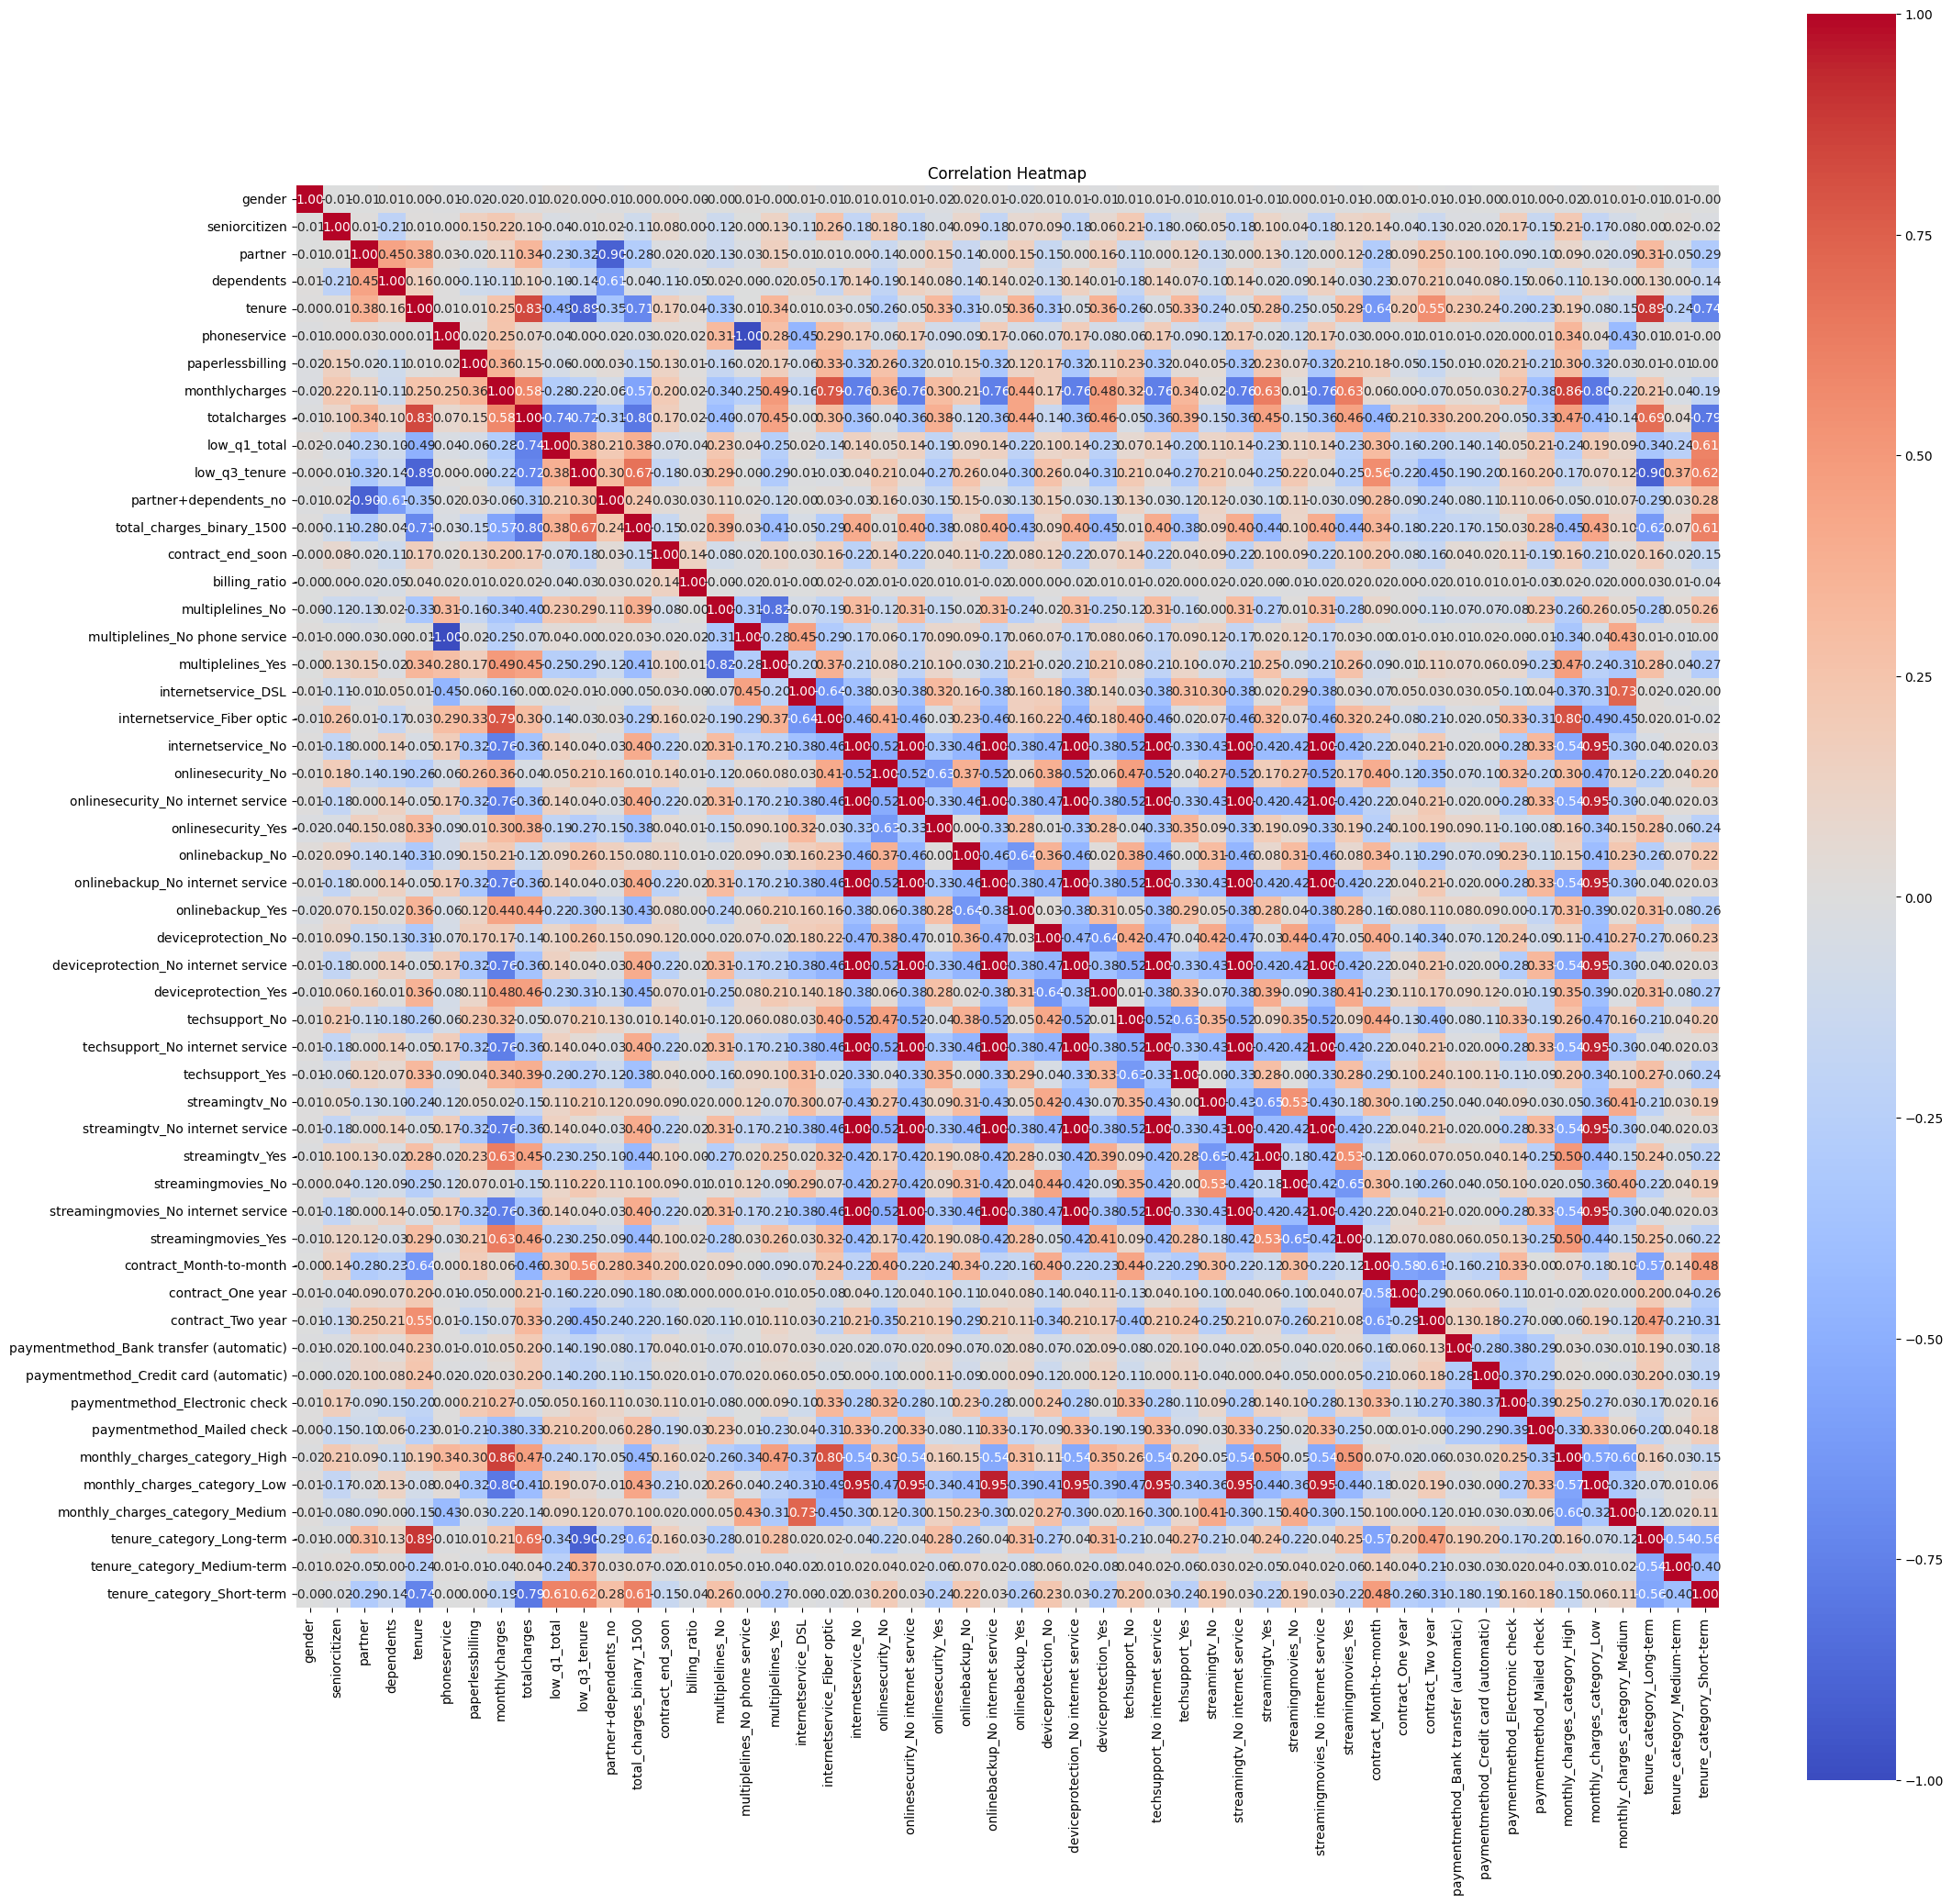

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관행렬 계산
correlation_matrix = x_train.corr()

# 히트맵 그리기
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
columns_with_internetserviceno = [col for col in train_set.columns if 'internet service' in col]
print(columns_with_internetserviceno)


['onlinesecurity_No internet service', 'onlinebackup_No internet service', 'deviceprotection_No internet service', 'techsupport_No internet service', 'streamingtv_No internet service', 'streamingmovies_No internet service']


In [ ]:
x_train.drop(columns=columns_with_internetserviceno, inplace=True)
x_test.drop(columns=columns_with_internetserviceno, inplace=True)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   seniorcitizen                            5634 non-null   int64  
 2   partner                                  5634 non-null   int64  
 3   dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   int64  
 5   phoneservice                             5634 non-null   int64  
 6   paperlessbilling                         5634 non-null   int64  
 7   monthlycharges                           5634 non-null   float64
 8   totalcharges                             5634 non-null   float64
 9   low_q1_total                             5634 non-null   int64  
 10  low_q3_tenure                            5634 no

In [ ]:
x_train.drop(columns='partner+dependents_no', inplace=True)
x_test.drop(columns='partner+dependents_no', inplace=True)

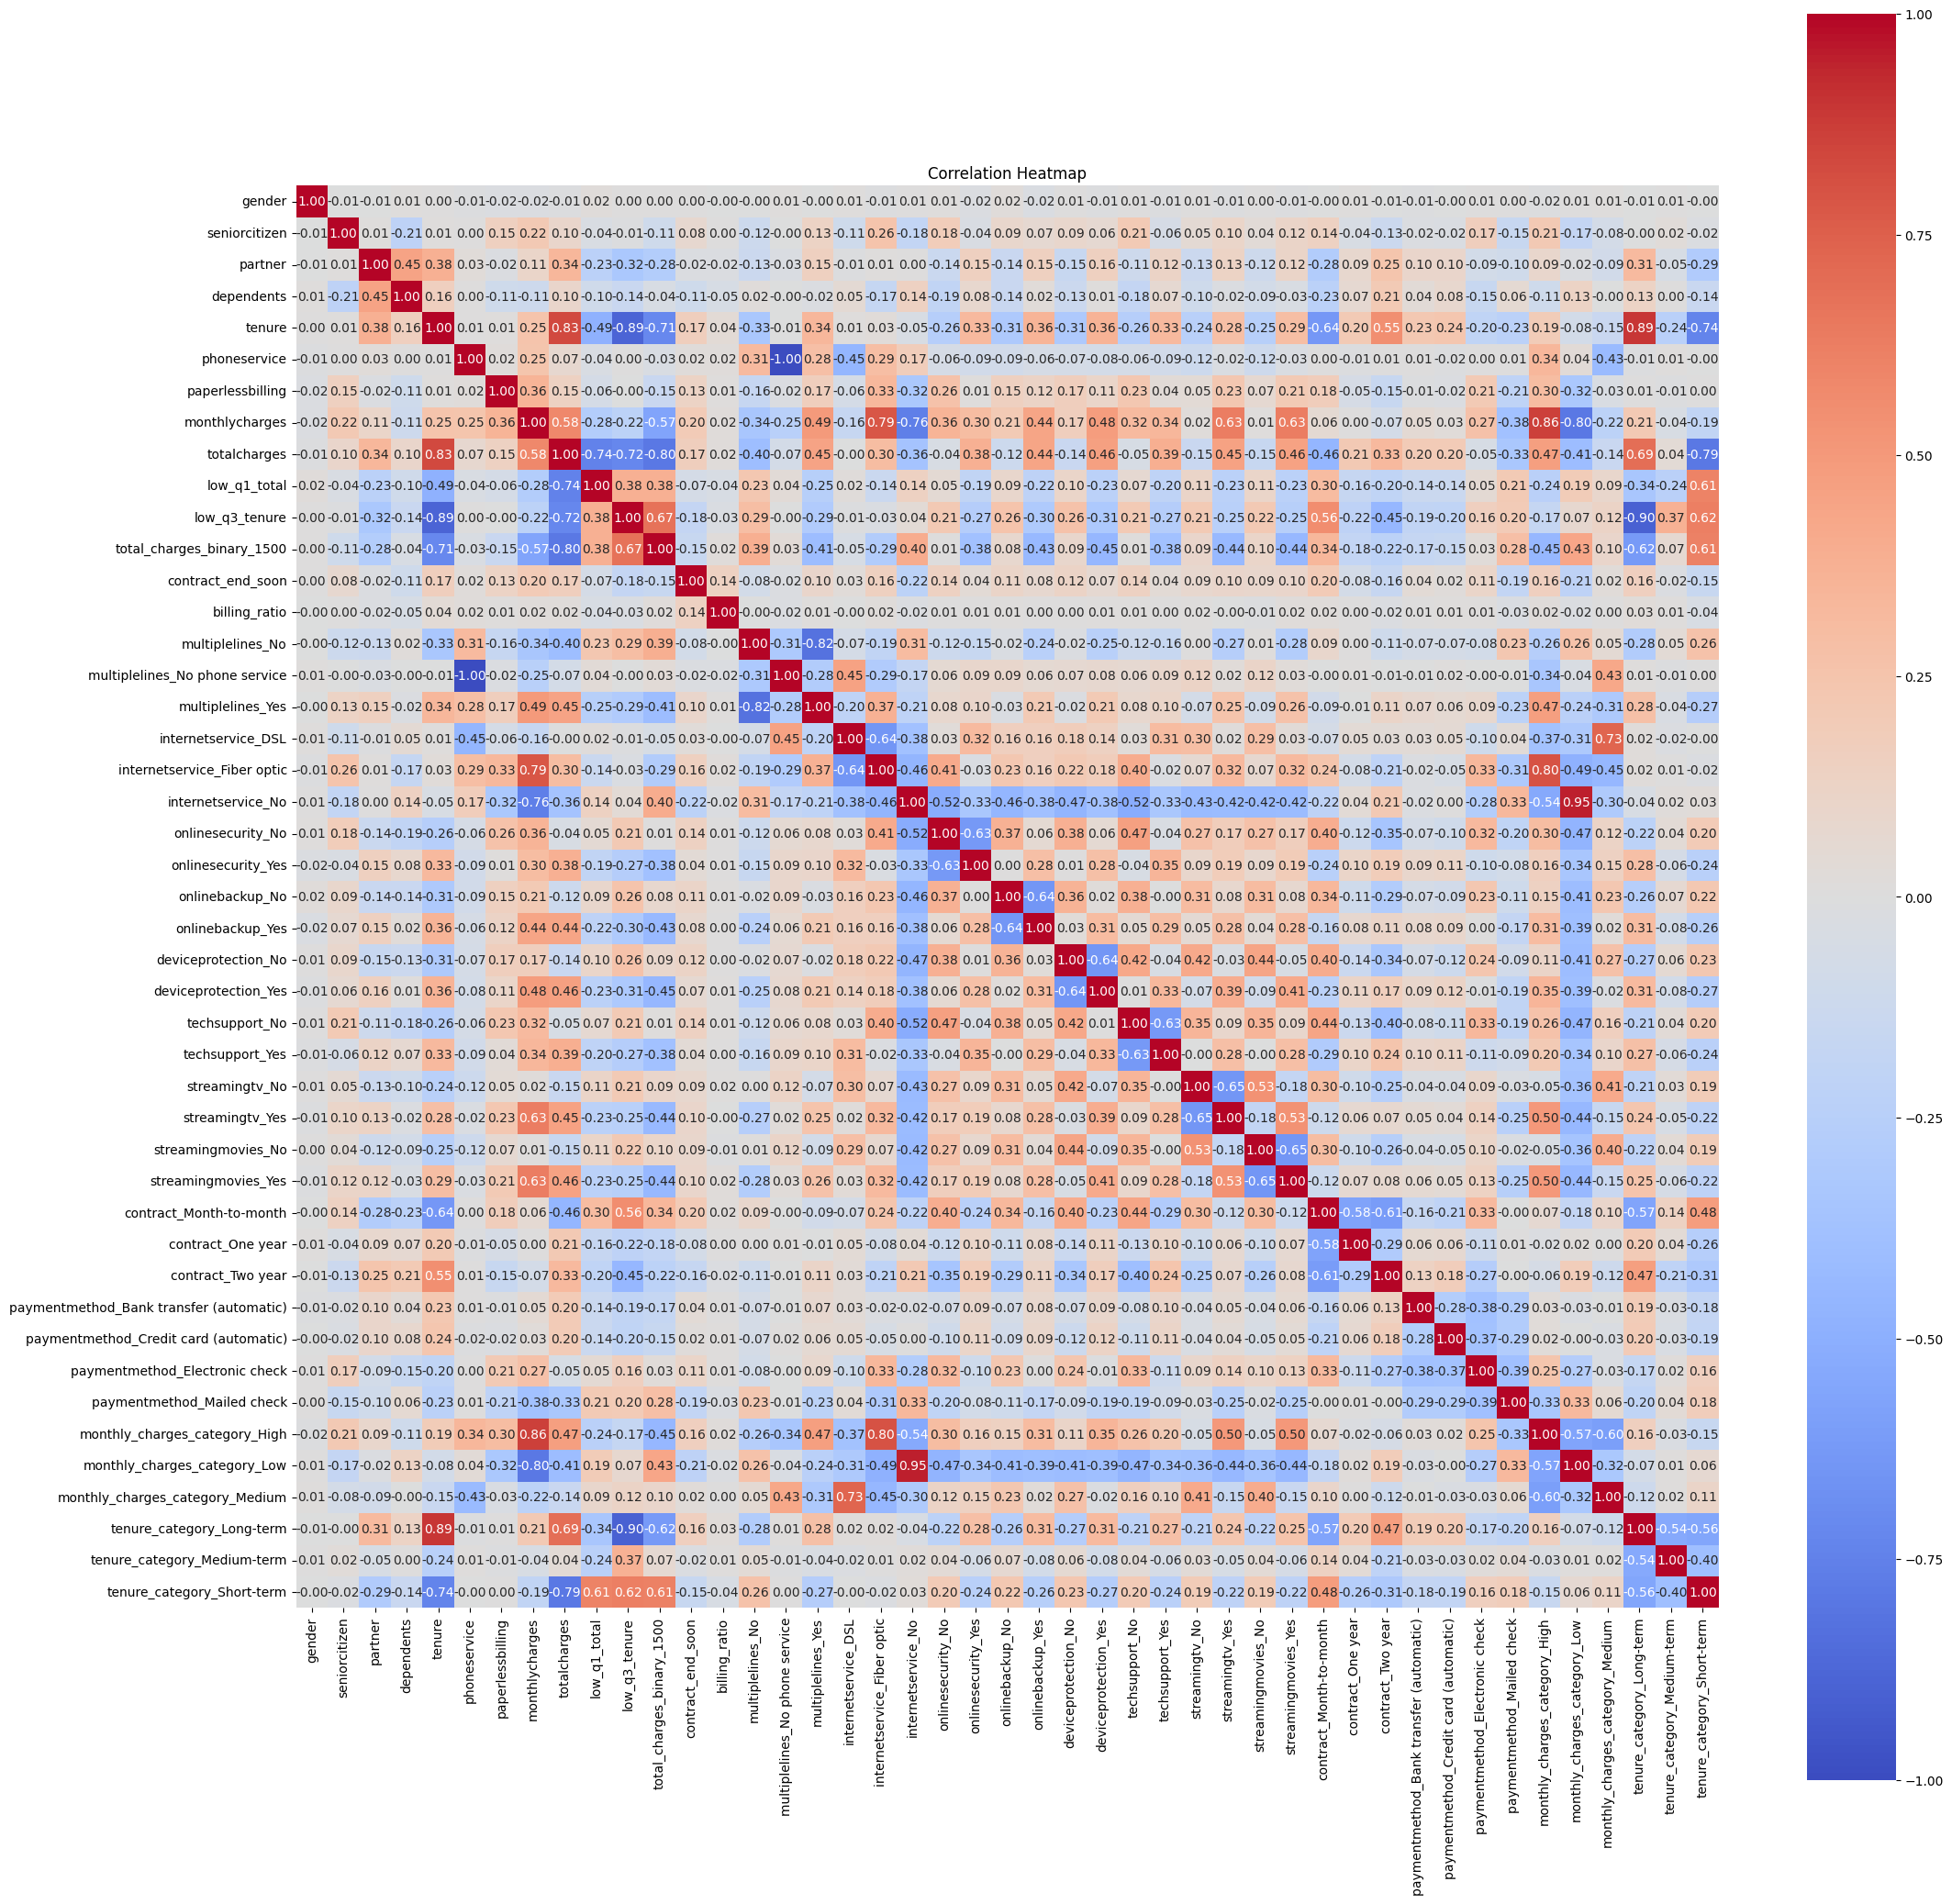

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관행렬 계산
correlation_matrix = x_train.corr()

# 히트맵 그리기
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
train_set = pd.concat([x_train, y_train_df],axis=1)
test_set = pd.concat([x_test, y_test_df],axis=1)

# AutoML

In [ ]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.5.2 which is incompatible.


In [ ]:
!pip install --upgrade pycaret

  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
print(train_set.columns)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'low_q1_total', 'low_q3_tenure', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'monthly_charges_category_High', 'monthly_charg

In [ ]:
from pycaret.classification import *


# PyCaret 설정
clf = setup(data=train_set, target='churn', session_id=42)

In [ ]:
# 모델 비교
best_model = compare_models()

# 최적 모델 확인
print(best_model)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


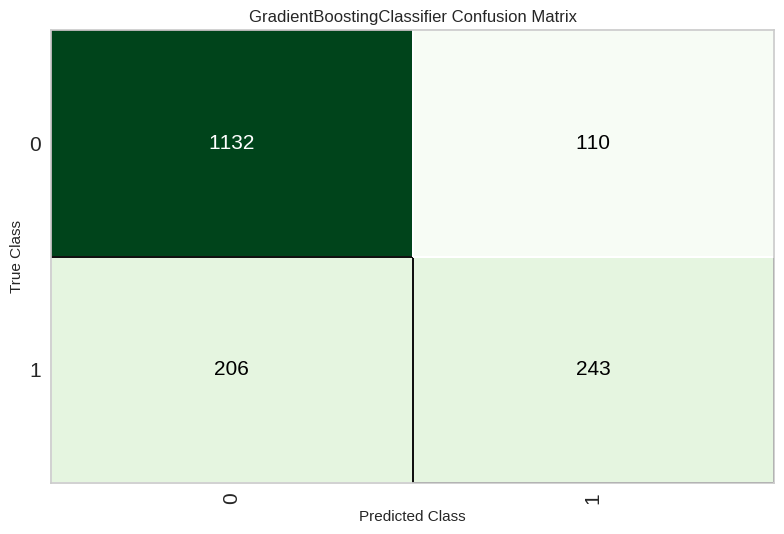

In [ ]:
#행렬그려보기
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
from pycaret.classification import predict_model

predictions = predict_model(best_model)

In [ ]:
test_set

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
0          0              0        1           0       1             0   
1          1              0        0           0      41             1   
2          0              0        1           1      52             1   
3          0              0        0           0       1             1   
4          1              0        0           0      67             1   
...      ...            ...      ...         ...     ...           ...   
1404       0              0        1           0      64             1   
1405       1              0        1           1      51             1   
1406       1              0        1           1      17             1   
1407       0              0        1           1      69             0   
1408       1              0        0           1       1             0   

      paperlessbilling  monthlycharges  totalcharges  low_q1_total  ...  \
0                    1       -1.331629     -2.413949             1  ...   
1                    1       -1.316672     -0.033799             0  ...   
2                    0       -1.512772     -0.011181             0  ...   
3                    0        0.381756     -1.698915             1  ...   
4                    0       -0.475768      0.737666             0  ...   
...                ...             ...           ...           ...  ...   
1404                 1        0.114195      0.929740             0  ...   
1405                 0        1.501854      1.099875             0  ...   
1406                 0       -1.494492     -0.752657             0  ...   
1407                 1       -0.695134      0.674819             0  ...   
1408                 1       -1.113924     -2.266614             1  ...   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                       0.0                             1.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             1.0   
4                                       0.0                             0.0   
...                                     ...                             ...   
1404                                    0.0                             0.0   
1405                                    1.0                             0.0   
1406                                    0.0                             0.0   
1407                                    1.0                             0.0   
1408                                    0.0                             0.0   

      paymentmethod_Mailed check  monthly_charges_category_High  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            1.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   
...                          ...                            ...   
1404                         1.0                            0.0   
1405                         0.0                            1.0   
1406                         0.0                            0.0   
1407                         0.0                            0.0   
1408                         1.0                            0.0   

      monthly_charges_category_Low  monthly_charges_category_Medium  \
0                              1.0                              0.0   
1                              1.0                              0.0   
2                              1.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              1.0   
...                            ...  

In [ ]:
# test_set에 대한 예측
test_predictions = predict_model(best_model, data=train_set)


In [ ]:
test_predictions = predict_model(best_model, data=test_set)

In [ ]:
# #### 모델 저장
# from pycaret.classification import save_model

# #### best_model을 저장
# save_model(best_model, 'best_model')



# #### 모델 불러오기
# from pycaret.classification import load_model

# #### 저장된 모델 로드
# loaded_model = load_model('best_model')

In [ ]:
predictions = predict_model(best_model)
print(predictions.columns)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'low_q1_total', 'low_q3_tenure', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'monthly_charges_category_High', 'monthly_charg

In [ ]:
predictions

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
4955       1              0        0           0      14             1   
3362       1              1        1           1      43             1   
1771       0              0        0           0      23             1   
5548       0              0        0           0       9             1   
5334       1              0        0           0      43             1   
...      ...            ...      ...         ...     ...           ...   
2389       1              0        1           1      72             1   
1648       0              0        0           0       4             1   
170        0              1        0           0      16             1   
4986       0              0        1           1      71             1   
521        1              0        0           1       3             1   

      paperlessbilling  monthlycharges  totalcharges  low_q1_total  ...  \
4955                 0        0.385079      0.040824             0  ...   
3362                 1        1.525120      0.974151             0  ...   
1771                 1        0.473158      0.345110             0  ...   
5548                 1        0.325252     -0.260195             0  ...   
5334                 1        1.214351      0.951555             0  ...   
...                ...             ...           ...           ...  ...   
2389                 0        0.792237      1.187082             0  ...   
1648                 1       -1.486182     -1.769075             1  ...   
170                  1        1.048164      0.266661             0  ...   
4986                 1        0.853726      1.160267             0  ...   
521                  0       -1.462916     -1.846659             1  ...   

      paymentmethod_Mailed check  monthly_charges_category_High  \
4955                         0.0                            1.0   
3362                         0.0                            1.0   
1771                         1.0                            1.0   
5548                         0.0                            1.0   
5334                         0.0                            1.0   
...                          ...                            ...   
2389                         0.0                            1.0   
1648                         0.0                            0.0   
170                          0.0                            1.0   
4986                         0.0                            1.0   
521                          1.0                            0.0   

      monthly_charges_category_Low  monthly_charges_category_Medium  \
4955                           0.0                              0.0   
3362                           0.0                              0.0   
1771                           0.0                              0.0   
5548                           0.0                              0.0   
5334                           0.0                              0.0   
...                            ...                              ...   
2389                           0.0                              0.0   
1648                           1.0                              0.0   
170                            0.0                              0.0   
4986                           0.0                              0.0   
521                            1.0                              0.0   

      tenure_category_Long-term  tenure_category_Medium-term  \
4955                        0.0                          1.0   
3362                        1.0                          0.0   
1771                        0.0                          1.0   
5548                        0.0                          0.0   
5334                        1.0                          0.0   
...                         ...                          ...   
2389                        1.0                          0.0   
1648                        0.0               

In [ ]:
# 잘못 예측한 데이터 찾기
misclassified = predictions[predictions['churn'] != predictions['prediction_label']]



In [ ]:
misclassified_real = predictions.loc[(predictions['churn']=='Yes')& (predictions['prediction_label']=='No')]

In [ ]:
misclassified_real

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
3362       1              1        1           1      43             1   
5548       0              0        0           0       9             1   
4845       0              0        0           0      64             1   
1764       1              0        0           0      12             1   
2661       0              0        0           0      34             1   
...      ...            ...      ...         ...     ...           ...   
1913       0              0        0           0       1             1   
49         0              1        1           1      40             1   
335        0              0        1           0       5             1   
1841       1              1        0           0      35             1   
1252       1              0        1           1      17             1   

      paperlessbilling  monthlycharges  totalcharges  low_q1_total  ...  \
3362                 1        1.525120      0.974151             0  ...   
5548                 1        0.325252     -0.260195             0  ...   
4845                 1        1.169480      1.161846             0  ...   
1764                 1       -0.646940     -0.458121             0  ...   
2661                 1        0.301986      0.571181             0  ...   
...                ...             ...           ...           ...  ...   
1913                 0       -1.507787     -2.563700             1  ...   
49                   1        0.986675      0.809508             0  ...   
335                  1        0.798884     -0.544741             0  ...   
1841                 1        1.016589      0.779048             0  ...   
1252                 0        0.531324      0.187847             0  ...   

      paymentmethod_Mailed check  monthly_charges_category_High  \
3362                         0.0                            1.0   
5548                         0.0                            1.0   
4845                         0.0                            1.0   
1764                         0.0                            0.0   
2661                         0.0                            1.0   
...                          ...                            ...   
1913                         1.0                            0.0   
49                           0.0                            1.0   
335                          1.0                            1.0   
1841                         0.0                            1.0   
1252                         0.0                            1.0   

      monthly_charges_category_Low  monthly_charges_category_Medium  \
3362                           0.0                              0.0   
5548                           0.0                              0.0   
4845                           0.0                              0.0   
1764                           0.0                              1.0   
2661                           0.0                              0.0   
...                            ...                              ...   
1913                           1.0                              0.0   
49                             0.0                              0.0   
335                            0.0                              0.0   
1841                           0.0                              0.0   
1252                           0.0                              0.0   

      tenure_category_Long-term  tenure_category_Medium-term  \
3362                        1.0                          0.0   
5548                        0.0                          0.0   
4845                        1.0                          0.0   
1764                        0.0                          1.0   
2661                        0.0                          1.0   
...                         ...                          ...   
1913                        0.0                          0.0   
49                          1.0               

In [ ]:
misclassified_not = predictions.loc[(predictions['churn']=='No')& (predictions['prediction_label']=='Yes')]

In [ ]:
misclassified_not

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
4955       1              0        0           0      14             1   
5279       1              0        0           0       6             1   
2842       1              0        0           0      44             1   
3977       0              1        0           0      14             1   
2460       0              0        1           1       5             1   
...      ...            ...      ...         ...     ...           ...   
1269       1              0        0           0       1             0   
3648       0              1        0           0       7             1   
1627       1              0        1           0       1             1   
4587       0              0        0           0       1             1   
831        1              1        1           0       7             1   

      paperlessbilling  monthlycharges  totalcharges  low_q1_total  ...  \
4955                 0        0.385079      0.040824             0  ...   
5279                 1        0.140785     -0.572734             0  ...   
2842                 1        1.550048      1.004972             0  ...   
3977                 1        0.514705      0.005258             0  ...   
2460                 0        0.169037     -0.771332             0  ...   
...                ...             ...           ...           ...  ...   
1269                 1       -1.344924     -2.424124             1  ...   
3648                 1        0.807193     -0.392123             0  ...   
1627                 0        0.348518     -1.707389             1  ...   
4587                 1       -0.339494     -1.913340             1  ...   
831                  1        0.350180     -0.440633             0  ...   

      paymentmethod_Mailed check  monthly_charges_category_High  \
4955                         0.0                            1.0   
5279                         0.0                            0.0   
2842                         0.0                            1.0   
3977                         0.0                            1.0   
2460                         0.0                            0.0   
...                          ...                            ...   
1269                         0.0                            0.0   
3648                         0.0                            1.0   
1627                         0.0                            1.0   
4587                         0.0                            0.0   
831                          0.0                            1.0   

      monthly_charges_category_Low  monthly_charges_category_Medium  \
4955                           0.0                              0.0   
5279                           0.0                              1.0   
2842                           0.0                              0.0   
3977                           0.0                              0.0   
2460                           0.0                              1.0   
...                            ...                              ...   
1269                           1.0                              0.0   
3648                           0.0                              0.0   
1627                           0.0                              0.0   
4587                           0.0                              1.0   
831                            0.0                              0.0   

      tenure_category_Long-term  tenure_category_Medium-term  \
4955                        0.0                          1.0   
5279                        0.0                          0.0   
2842                        1.0                          0.0   
3977                        0.0                          1.0   
2460                        0.0                          0.0   
...                         ...                          ...   
1269                        0.0                          0.0   
3648                        0.0               

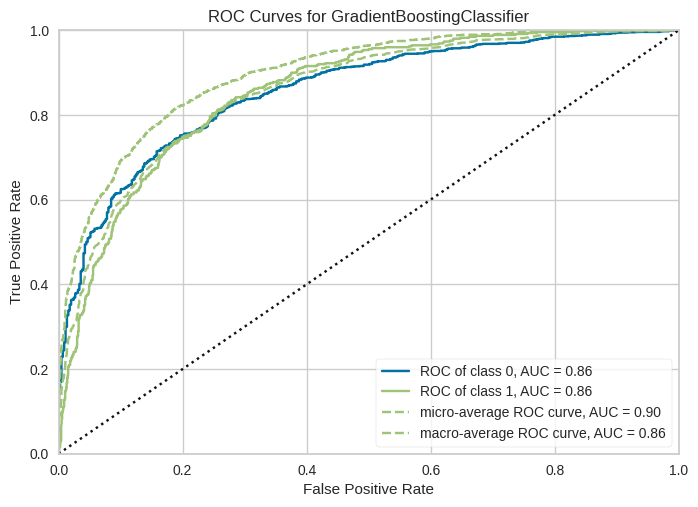

In [ ]:
# plot AUC
plot_model(best_model, plot = 'auc')

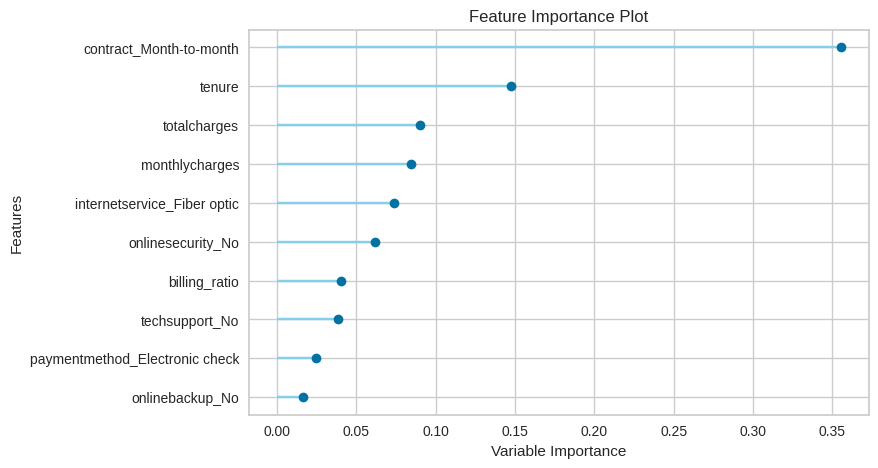

In [ ]:
# plot feature importance
plot_model(best_model, plot = 'feature')

#y값 0과1로 바꿔주기

In [ ]:
# y_train과 y_test의 값을 변환
y_train = y_train.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})


# 모델1:로지스틱회귀


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# x_train으로 모델 학습
model.fit(x_train, y_train)

# x_test로 예측
y_pred_proba = model.predict_proba(x_test)[:, 1]
# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)

print(f'AUC: {auc:.4f}')

AUC: 0.8656


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 하이퍼파라미터 공간 정의
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # 정규화 강도
    'solver': ['liblinear', 'lbfgs', 'saga']  # 최적화 알고리즘
}

# 랜덤 그리드 서치 설정
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions,
    n_iter=100,  # 랜덤 샘플 수
    scoring='roc_auc',
    cv=10,  # 교차 검증 분할 수
    random_state=42,
    n_jobs=-1  # 모든 코어 사용
)

# 훈련 데이터로 모델 학습
random_search.fit(x_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
best_model = random_search.best_estimator_
print(f'Best Parameters: {random_search.best_params_}')

Best Parameters: {'solver': 'lbfgs', 'C': 0.08858667904100823}


In [ ]:
# 최적의 하이퍼파라미터로 로지스틱 회귀 모델 생성
final_model = LogisticRegression(solver='lbfgs', C=  0.08858667904100823)

# x_train_encoded로 최종 모델 학습
final_model.fit(x_train, y_train)

# x_test_encoded로 예측
y_pred_proba_test = final_model.predict_proba(x_test)[:, 1]  # 양성 클래스 확률
y_pred_proba_train = final_model.predict_proba(x_train)[:, 1]

# AUC 계산
auc_test = roc_auc_score(y_test, y_pred_proba_test)
auc_train = roc_auc_score(y_train,y_pred_proba_train)

print(f'Final AUC: {auc_test:.4f}')
print(f'Final AUC: {auc_train:.4f}')


Final AUC: 0.8657
Final AUC: 0.8506


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   seniorcitizen                            5634 non-null   int64  
 2   partner                                  5634 non-null   int64  
 3   dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   int64  
 5   phoneservice                             5634 non-null   int64  
 6   paperlessbilling                         5634 non-null   int64  
 7   monthlycharges                           5634 non-null   float64
 8   totalcharges                             5634 non-null   float64
 9   low_q1_total                             5634 non-null   int64  
 10  low_q3_tenure                            5634 no

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# StratifiedKFold를 사용하여 시드 설정
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(final_model, x_train, y_train, cv=kf, scoring='roc_auc')

print(f'Cross-Validated AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

Cross-Validated AUC: 0.8460 ± 0.0193


#앙상블

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 클래스 가중치 설정 (자동 계산)
class_weights = {0: 1, 1: 10}  # 1에 더 높은 가중치 부여

# 앙상블 모델 생성
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage= 'auto')
lr = LogisticRegression(solver='lbfgs', C= 0.08858667904100823, class_weight=class_weights)
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=7)

ensemble_model = VotingClassifier(estimators=[
    ('lda', lda),
    ('logistic', lr),
    ('gbc', gbc)
], voting='soft')

# 앙상블 모델 학습
ensemble_model.fit(x_train, y_train)

# x_test로 예측
y_pred_proba_test = ensemble_model.predict_proba(x_test)[:, 1]  # 양성 클래스 확률
y_pred_proba_train = ensemble_model.predict_proba(x_train)[:, 1]

# AUC 계산
auc_test = roc_auc_score(y_test, y_pred_proba_test)
auc_train = roc_auc_score(y_train, y_pred_proba_train)

print(f'Final AUC_test: {auc_test:.4f}')
print(f'Final AUC_train: {auc_train:.4f}')



Final AUC_test: 0.8642
Final AUC_train: 0.9141


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 클래스 가중치 설정
class_weights = {0: 1, 1: 15}  # 1에 더 높은 가중치 부여

# 앙상블 모델 생성
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lr = LogisticRegression(solver='lbfgs', C= 0.08858667904100823, class_weight=class_weights, random_state=42)
rf = RandomForestClassifier(n_estimators=50, class_weight=class_weights, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=7, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('lda', lda),
    ('logistic', lr),
    ('random_forest', rf),
    ('gbc', gbc)
], voting='soft')

# 앙상블 모델 학습
ensemble_model.fit(x_train, y_train)

# x_test로 예측
y_pred_proba_test = ensemble_model.predict_proba(x_test)[:, 1]  # 양성 클래스 확률
y_pred_proba_train = ensemble_model.predict_proba(x_train)[:, 1]

# AUC 계산
auc_test = roc_auc_score(y_test, y_pred_proba_test)
auc_train = roc_auc_score(y_train, y_pred_proba_train)

print(f'Final AUC_test: {auc_test:.4f}')
print(f'Final AUC_train: {auc_train:.4f}')



Final AUC_test: 0.8626
Final AUC_train: 0.9730


# 랜덤그리드서치

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# LDA 하이퍼파라미터 공간 정의
lda_param_distributions = {
    'solver': ['svd', 'lsqr', 'eigen'],  # LDA에 대한 다양한 솔버
    'shrinkage': [None, 'auto']  # 축소 여부
}


# 랜덤 그리드 서치 설정
lda_search = RandomizedSearchCV(
    LinearDiscriminantAnalysis(),
    lda_param_distributions,
    n_iter=100,
    scoring='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1
)

# 훈련 데이터로 모델 학습
lda_search.fit(x_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
best_lda_model = lda_search.best_estimator_
print(f'Best LDA Parameters: {lda_search.best_params_}')

Best LDA Parameters: {'solver': 'svd', 'shrinkage': None}


In [ ]:
# Gradient Boosting Classifier 하이퍼파라미터 공간 정의
gbc_param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}


gbc_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    gbc_param_distributions,
    n_iter=100,
    scoring='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1
)

# 훈련 데이터로 모델 학습
gbc_search.fit(x_train, y_train)

best_gbc_model = gbc_search.best_estimator_
print(f'Best Gradient Boosting Parameters: {gbc_search.best_params_}')

Best Gradient Boosting Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


# 랜덤그리드서치 후 다시 한 번 더 돌리기

In [ ]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import roc_auc_score

# 클래스 가중치 설정
class_weights = {0: 1, 1: 15}


# 앙상블 모델 생성
lda = LinearDiscriminantAnalysis(solver='svd')
lr = LogisticRegression(solver='lbfgs', C= 0.08858667904100823, class_weight=class_weights, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=3,learning_rate= 0.1, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('lda', lda),
    ('logistic', lr),
    ('gbc', gbc)
], voting='soft')

# 앙상블 모델 학습
ensemble_model.fit(x_train, y_train)

# x_test_encoded로 예측
y_pred_proba_test = ensemble_model.predict_proba(x_test)[:, 1]  # 양성 클래스 확률
y_pred_proba_train = ensemble_model.predict_proba(x_train)[:, 1]

# AUC 계산
auc_test = roc_auc_score(y_test, y_pred_proba_test)
auc_train = roc_auc_score(y_train, y_pred_proba_train)

print(f'Final AUC_test: {auc_test:.4f}')
print(f'Final AUC_train: {auc_train:.4f}')

Final AUC_test: 0.8658
Final AUC_train: 0.8580


# 영향력 가져오기

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(C=0.08858667904100823, class_weight={0: 1, 1: 15},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
model_l=lr.fit(x_train,y_train)

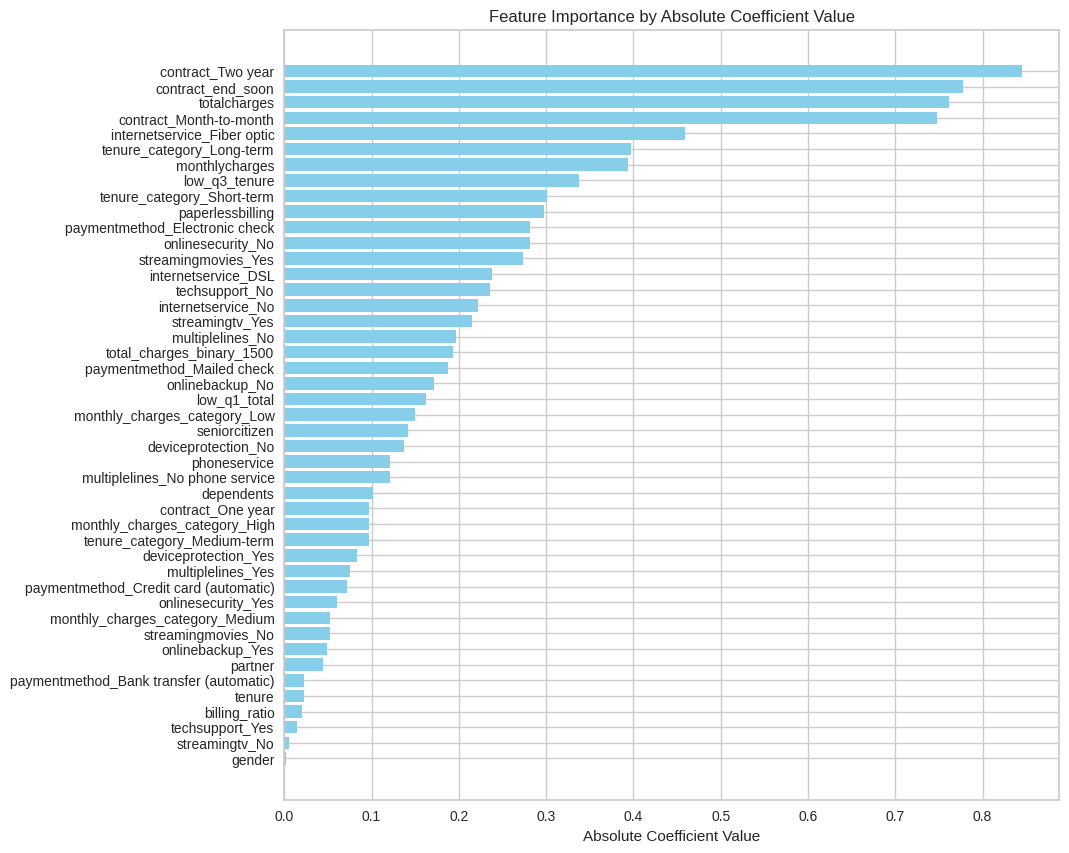

In [ ]:
# 회귀 계수 출력
coefficients = model_l.coef_[0]  # 첫 번째 클래스에 대한 계수
feature_names = x_train.columns

# 피처와 계수를 데이터프레임으로 결합
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 절댓값 기준으로 정렬
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# 모든 피처 시각화
plt.figure(figsize=(10, 10))
plt.barh(coef_df['Feature'], coef_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance by Absolute Coefficient Value')
plt.gca().invert_yaxis()  # 상위 피처가 위에 오도록
plt.show()

In [ ]:
model_lda=lda.fit(x_train, y_train)

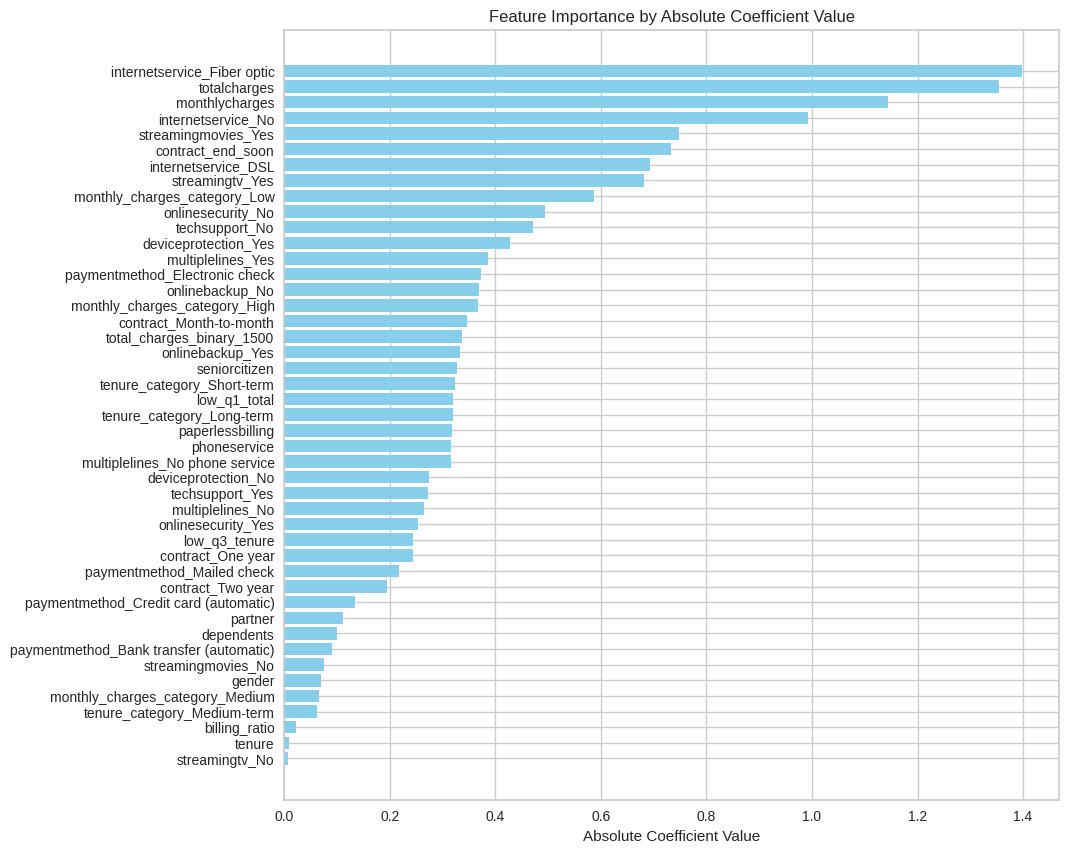

In [ ]:
# 회귀 계수 출력
coefficients = model_lda.coef_[0]  # 첫 번째 클래스에 대한 계수
feature_names = x_train.columns

# 피처와 계수를 데이터프레임으로 결합
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 절댓값 기준으로 정렬
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# 모든 피처 시각화
plt.figure(figsize=(10, 10))
plt.barh(coef_df['Feature'], coef_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance by Absolute Coefficient Value')
plt.gca().invert_yaxis()  # 상위 피처가 위에 오도록
plt.show()

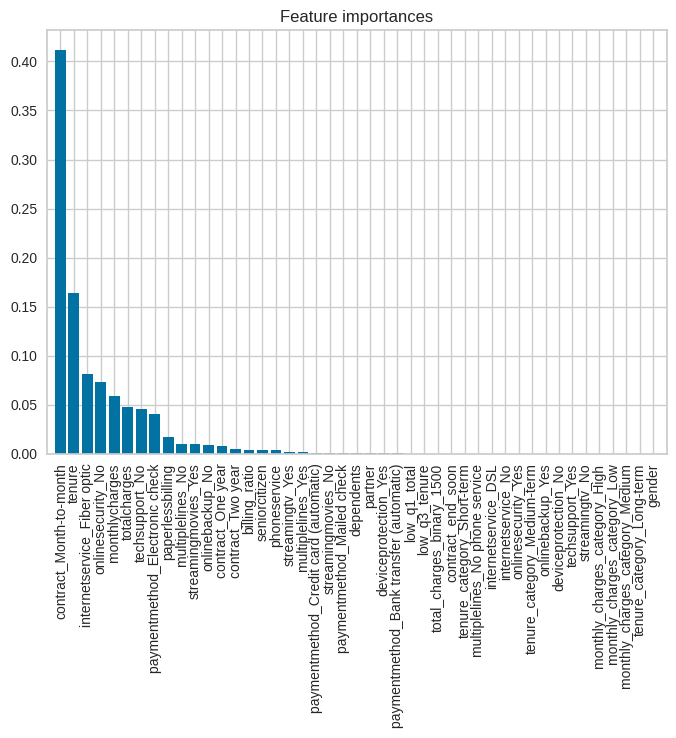

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(x_train, y_train)

# 피처 중요도 추출
importances = gbc.feature_importances_
feature_names = x_train.columns

# 중요도 시각화
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# 교차 검증

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   seniorcitizen                            5634 non-null   int64  
 2   partner                                  5634 non-null   int64  
 3   dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   int64  
 5   phoneservice                             5634 non-null   int64  
 6   paperlessbilling                         5634 non-null   int64  
 7   monthlycharges                           5634 non-null   float64
 8   totalcharges                             5634 non-null   float64
 9   low_q1_total                             5634 non-null   int64  
 10  low_q3_tenure                            5634 no

#전체데이터 넣어보기

In [158]:
all_set = pd.concat([train_set, test_set])


In [159]:
# 'churn' 열을 먼저 가져오고, 그 다음 삭제합니다.
all_set_y = all_set['churn']  # 먼저 'churn'을 따로 저장
all_set.drop(['churn'], axis=1, inplace=True)  # 그 다음 삭제

In [ ]:
ensemble_model.fit(x_train, y_train)
ensemble_model.predict_proba(all_set)

y_pred_proba_all_test = ensemble_model.predict_proba(all_set)[:, 1]  # 양성 클래스 확률

# AUC 계산
auc_test = roc_auc_score(all_set_y, y_pred_proba_all_test)


print(f'Final AUC_test: {auc_test:.4f}')


Final AUC_test: 0.8596


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# StratifiedKFold를 사용하여 시드 설정
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(ensemble_model, all_set, all_set_y, cv=kf, scoring='roc_auc')

print(f'Cross-Validated AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

Cross-Validated AUC: 0.8508 ± 0.0170


# 모델 저장

In [ ]:
all_set.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'low_q1_total', 'low_q3_tenure', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'monthly_charges_category_High', 'monthly_charg

In [ ]:
# 모델을 저장할 때 피처 이름 목록도 함께 저장
features = ['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'low_q1_total', 'low_q3_tenure', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'monthly_charges_category_High', 'monthly_charges_category_Low',
       'monthly_charges_category_Medium', 'tenure_category_Long-term',
       'tenure_category_Medium-term', 'tenure_category_Short-term'],

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

# 모델을 저장할 경로 설정
save_path = '/content/drive/My Drive/model_and_features.pickle'

# 모델과 피처 목록 저장
with open(save_path, 'wb') as file:
    pickle.dump((ensemble_model, features), file)

# 그래프 (준경님 이거는 무시해주세요)

In [160]:
combined_set = pd.concat([all_set, all_set_y], axis=1)

In [ ]:
all_set.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'low_q1_total', 'low_q3_tenure', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'monthly_charges_category_High', 'monthly_charg

In [ ]:
combined_set

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
0          0              0        0           1      21             1   
1          0              0        0           0      54             1   
2          1              0        1           0       1             0   
3          1              0        0           0       4             1   
4          1              0        0           1       0             1   
...      ...            ...      ...         ...     ...           ...   
1404       0              0        1           0      64             1   
1405       1              0        1           1      51             1   
1406       1              0        1           1      17             1   
1407       0              0        1           1      69             0   
1408       1              0        0           1       1             0   

      paperlessbilling  monthlycharges  totalcharges  low_q1_total  ...  \
0                    0       -0.000474      0.157391             0  ...   
1                    1        1.074754      1.032759             0  ...   
2                    1       -1.376499     -2.448949             1  ...   
3                    1        0.177346     -0.964379             0  ...   
4                    1       -0.098524      0.508058             0  ...   
...                ...             ...           ...           ...  ...   
1404                 1        0.114195      0.929740             0  ...   
1405                 0        1.501854      1.099875             0  ...   
1406                 0       -1.494492     -0.752657             0  ...   
1407                 1       -0.695134      0.674819             0  ...   
1408                 1       -1.113924     -2.266614             1  ...   

      paymentmethod_Credit card (automatic)  paymentmethod_Electronic check  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             1.0   
3                                       0.0                             1.0   
4                                       0.0                             0.0   
...                                     ...                             ...   
1404                                    0.0                             0.0   
1405                                    1.0                             0.0   
1406                                    0.0                             0.0   
1407                                    1.0                             0.0   
1408                                    0.0                             0.0   

      paymentmethod_Mailed check  monthly_charges_category_High  \
0                            1.0                            0.0   
1                            0.0                            1.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   
...                          ...                            ...   
1404                         1.0                            0.0   
1405                         0.0                            1.0   
1406                         0.0                            0.0   
1407                         0.0                            0.0   
1408                         1.0                            0.0   

      monthly_charges_category_Low  monthly_charges_category_Medium  \
0                              0.0                              1.0   
1                              0.0                              0.0   
2                              1.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              1.0   
...                            ...  

In [161]:
# total_charges_binary_1500이 0인 행의 개수
row_count = combined_set[combined_set['total_charges_binary_1500'] == 1].shape[0]

print(f"Row count where total_charges_binary_1500 is 0: {row_count}")


Row count where total_charges_binary_1500 is 0: 3661


#1번 : 계약 기간

In [162]:
# churn이 1인 데이터만 필터링
churn_1_data = combined_set[combined_set['churn'] == 'Yes']

# 계약 기간별 카운트
contract_one_counts = churn_1_data['contract_One year'].value_counts()
contract_two_counts = churn_1_data['contract_Two year'].value_counts()
contract_months_counts = churn_1_data['contract_Month-to-month'].value_counts()

# 결과 출력

print(contract_one_counts)

print(contract_two_counts)

print(contract_months_counts)



contract_One year
0.0    1703
1.0     166
Name: count, dtype: int64
contract_Two year
0.0    1821
1.0      48
Name: count, dtype: int64
contract_Month-to-month
1.0    1655
0.0     214
Name: count, dtype: int64


검정

In [155]:
combined_set = pd.concat([all_set, all_set_y], axis=1)

In [ ]:
combined_set['churn'] = combined_set['churn'].map({'Yes': 1, 'No': 0})
combined_set['contract_Oneyear'] = combined_set['contract_One year']
combined_set['contract_Twoyear']= combined_set['contract_Two year']
combined_set['contract_Month_to_month'] = combined_set['contract_Month-to-month']

#contract
def assign_contract(row):
    if row['contract_Oneyear'] == 1:
        return 'oneyear'
    elif row['contract_Twoyear'] == 1:
        return 'twoyear'
    elif row['contract_Month_to_month'] == 1:
        return 'monthtomonth'
    else:
        return None  # 모든 조건이 충족되지 않는 경우 None 반환

# 새로운 contract 변수 생성
combined_set['contract'] = combined_set.apply(assign_contract, axis=1)

In [ ]:
combined_set['contract']

0            oneyear
1            twoyear
2       monthtomonth
3       monthtomonth
4            twoyear
            ...     
1404         twoyear
1405         oneyear
1406         oneyear
1407         twoyear
1408    monthtomonth
Name: contract, Length: 7043, dtype: object

In [ ]:
print(combined_set.shape)

(7043, 50)


In [ ]:
combined_set_contract = pd.DataFrame()
combined_set_contract['churn'] = combined_set['churn']
combined_set_contract['contract_Oneyear'] = combined_set['contract_One year']
combined_set_contract['contract_Twoyear']= combined_set['contract_Two year']
combined_set_contract['contract_Month_to_month'] = combined_set['contract_Month-to-month']

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# 상수 추가
combined_set_contract = sm.add_constant(combined_set)

# 로지스틱 회귀 모델 적합
formula = 'churn ~ C(contract, Treatment(reference="oneyear"))'
model = logit(formula, data=combined_set_contract).fit()

# 결과 출력
print(model.summary())

#모델의 설명력 : pseudo r^2 = 17% , 일반적으로 로지스틱 회귀 : 0.2 정도면 중간정도의 설명력을 갖는다고 봄

Optimization terminated successfully.
         Current function value: 0.480146
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.1702
Time:                        23:30:55   Log-Likelihood:                -3381.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                7.213e-302
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# 오즈비 계산
odds_ratios = np.exp(model.params)

# 퍼센트 변화 계산
percent_changes = (odds_ratios - 1) * 100

# 오즈비와 퍼센트 변화 출력
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Percent Change': percent_changes
})

print(odds_ratios_df)

#해석: Month-to-month 계약을 가진 고객의 이탈 확률이 One year 계약을 가진 고객에 비해 약 5.87배 높다는 것을 의미합니다.
#Month-to-month 계약의 이탈 확률은 One year 계약보다 약 486% 높아진다고 해석할 수 있습니다.

# two-year 계약을 가진 고객의 이탈 확률이 One year 계약을 가진 고객에 비해 약 0.23배 낮다는 것을 의미합니다.
#Month-to-month 계약의 이탈 확률은 One year 계약보다 약 77% 낮아진다고 해석할 수 있습니다.


# 가설 설정
# 귀무가설 (H0): 세 계약 유형(One year, Two year, Month-to-month) 간의 이탈 확률에는 차이가 없다.
# 대립가설 (H1):세 계약 유형 간의 이탈 확률에 차이가 있다.

#오즈비가 e의베타계수지

                                                    Odds Ratio  Percent Change
Intercept                                             0.127008      -87.299158
C(contract, Treatment(reference="oneyear"))[T.m...    5.869654      486.965429
C(contract, Treatment(reference="oneyear"))[T.t...    0.229464      -77.053569


# 2. 인터넷서비스유형 중 fiber optic

In [ ]:
combined_set = pd.concat([all_set, all_set_y], axis=1)
combined_set['churn'] = combined_set['churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# 광섬유,,? internetservice중,,광섬유???
contract_one_counts = churn_1_data['internetservice_Fiber optic'].value_counts()
# 결과 출력

print(contract_one_counts)


internetservice_Fiber optic
1.0    1297
0.0     572
Name: count, dtype: int64


In [ ]:
import pandas as pd
import statsmodels.api as sm

# 데이터 준비
X = combined_set['internetservice_Fiber optic']
y = combined_set['churn']  # 이탈 여부를 숫자로 변환

# 데이터 형식 확인 및 변환
X = X.astype(int)

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 결과 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.530790
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.08263
Time:                        23:30:55   Log-Likelihood:                -3738.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                1.790e-148
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7750      0.045    -39.256      0.000   

In [ ]:

# 오즈비 계산
odds_ratio = np.exp(result.params)
print("오즈비:")
print(odds_ratio)

# % 변화 계산
percentage_increase = (odds_ratio - 1) * 100
print("이탈 확률 증가(%):")
print(percentage_increase)


# 광섬유 서비스를 사용하는 고객의 이탈 확률이 아닌 고객에 비해 약 4.25배 높으며, 이는 약 325% 증가하는 것이라고 할 수 있습니다.
# H0: internetservice_Fiber optic 변수는 고객의 이탈에 영향을 미치지 않는다
# H1: internetservice_Fiber optic 변수는 고객의 이탈에 영향을 미친다

오즈비:
const                          0.169481
internetservice_Fiber optic    4.253893
dtype: float64
이탈 확률 증가(%):
const                          -83.051852
internetservice_Fiber optic    325.389299
dtype: float64


#3.monthly_charges_low,me,high

In [ ]:
combined_set = pd.concat([all_set, all_set_y], axis=1)
combined_set['churn'] = combined_set['churn'].map({'Yes': 1, 'No': 0})

In [ ]:
print(churn_1_data['monthly_charges_category_Low'].value_counts())
print(churn_1_data['monthly_charges_category_Medium'].value_counts())
print(churn_1_data['monthly_charges_category_High'].value_counts())

monthly_charges_category_Low
0.0    1707
1.0     162
Name: count, dtype: int64
monthly_charges_category_Medium
0.0    1436
1.0     433
Name: count, dtype: int64
monthly_charges_category_High
1.0    1274
0.0     595
Name: count, dtype: int64


In [ ]:


def assign_charges(row):
    if row['monthly_charges_category_Low'] == 1:
        return 'monthly_charges_category_Low'
    elif row['monthly_charges_category_Medium'] == 1:
        return 'monthly_charges_category_Medium'
    elif row['monthly_charges_category_High'] == 1:
        return 'monthly_charges_category_High'
    else:
        return None  # 모든 조건이 충족되지 않는 경우 None 반환

# 새로운 contract 변수 생성
combined_set['charges_lmh'] = combined_set.apply(assign_charges, axis=1)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# 상수 추가
combined_set_contract = sm.add_constant(combined_set)

# 로지스틱 회귀 모델 적합
formula = 'churn ~ C(charges_lmh, Treatment(reference="monthly_charges_category_Low"))'
model = logit(formula, data=combined_set_contract).fit()

# 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.547822
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.05319
Time:                        23:30:55   Log-Likelihood:                -3858.3
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                 7.277e-95
                                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
# 오즈비 계산
odds_ratios = np.exp(model.params)

# 퍼센트 변화 계산
percent_changes = (odds_ratios - 1) * 100

# 오즈비와 퍼센트 변화 출력
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Percent Change': percent_changes
})

print(odds_ratios_df)

#해석 hight계수 (1.6215): monthly_charges_category_High가 1일 때, 이탈 확률의 로그 오즈가 약 1.6215만큼 증가합니다. 즉, 높은 요금 범주에서 고객의 이탈 확률이 증가합니다.
#계수 (1.0707): monthly_charges_category_Medium가 1일 때, 이탈 확률의 로그 오즈가 약 1.0707만큼 증가합니다. 즉, 중간 요금 범주에서 고객의 이탈 확률이 증가합니다.

#가설 설정
# 1. 귀무가설 (H0)
# H0: monthly_charges_category_High, monthly_charges_category_Medium, monthly_charges_category_Low은 고객의 이탈에 영향을 미치지 않는다.
# 즉, 세 범주 간 고객의 이탈 확률에 차이가 없다.
# 2. 대립가설 (H1)
# H1: monthly_charges_category_High 및/또는 monthly_charges_category_Medium은 고객의 이탈에 영향을 미친다.
# 즉, 세 범주 중 적어도 하나가 고객의 이탈 확률에 유의미한 영향을 미친다.

# 고객의 요금 범주가 높아질수록 이탈 확률이 유의미하게 증가합니다.
# 고객이 높은 요금을 지불할 때 이탈 확률은 약 5.06배 높아지고, 중간 요금의 경우에도 이탈 확률이 약 2.92배 높아집니다.
# 저요금 범주는 기준(reference)으로 설정되어 있으며, 이 두 범주와 비교할 때 유의미한 영향을 미친다고 볼 수 있습니다.

                                                    Odds Ratio  Percent Change
Intercept                                             0.108652      -89.134809
C(charges_lmh, Treatment(reference="monthly_cha...    5.060647      406.064675
C(charges_lmh, Treatment(reference="monthly_cha...    2.917426      191.742584


# 4. tenure_charges _ short, medium, long

In [ ]:
combined_set = pd.concat([all_set, all_set_y], axis=1)
combined_set['churn'] = combined_set['churn'].map({'Yes': 1, 'No': 0})

In [ ]:
print(churn_1_data['tenure_category_Short-term'].value_counts())
print(churn_1_data['tenure_category_Medium-term'].value_counts())
print(churn_1_data['tenure_category_Long-term'].value_counts())

tenure_category_Short-term
1.0    999
0.0    870
Name: count, dtype: int64
tenure_category_Medium-term
0.0    1367
1.0     502
Name: count, dtype: int64
tenure_category_Long-term
0.0    1501
1.0     368
Name: count, dtype: int64


In [ ]:
# 열 이름 변경
combined_set = combined_set.rename(columns={
    'tenure_category_Short-term': 'tenure_category_Short_term',
    'tenure_category_Medium-term': 'tenure_category_Medium_term',
    'tenure_category_Long-term': 'tenure_category_Long_term'
})

# 변경된 열 이름 확인
print(combined_set.columns)


Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'low_q1_total', 'low_q3_tenure', 'total_charges_binary_1500',
       'contract_end_soon', 'billing_ratio', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'monthly_charges_category_High', 'monthly_charg

In [ ]:
def assign_tenure_lmh(row):
    if row['tenure_category_Short_term'] == 1:
        return 'Short_term'
    elif row['tenure_category_Medium_term'] == 1:
        return 'Medium_term'
    elif row['tenure_category_Long_term'] == 1:
        return 'Long_term'
    else:
        return None  # 모든 조건이 충족되지 않는 경우 None 반환

# 새로운 contract 변수 생성
combined_set['tenure_lmh'] = combined_set.apply(assign_tenure_lmh, axis=1)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# 상수 추가
combined_set_contract = sm.add_constant(combined_set)

# 로지스틱 회귀 모델 적합
formula = 'churn ~ C(tenure_lmh, Treatment(reference="Short_term"))'
model = logit(formula, data=combined_set_contract).fit()

# 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.519697
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.1018
Time:                        23:30:56   Log-Likelihood:                -3660.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                6.836e-181
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
In

In [ ]:
# 오즈비 계산
odds_ratios = np.exp(model.params)

# 퍼센트 변화 계산
percent_changes = (odds_ratios - 1) * 100

# 오즈비와 퍼센트 변화 출력
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Percent Change': percent_changes
})

print(odds_ratios_df)

# #가설 설정
# 1. 귀무가설 (H0)
# H0: 고객의 tenure (단기, 중기, 장기)와 이탈 여부는 독립적이다.
# 즉, tenure 범주 간 고객의 이탈 확률에 차이가 없다.
# 2. 대립가설 (H1)
# H1: 고객의 tenure (단기, 중기, 장기)는 이탈 여부에 영향을 미친다.
# 즉, 적어도 하나의 tenure 범주가 고객의 이탈 확률에 유의미한 영향을 미친다.
# 결과 해석
# Intercept (상수항):

# 계수: -0.0687
# 해석: 모든 변수(tenure)가 0일 때 이탈 확률의 로그 오즈가 약 -0.0687입니다. 이는 기본 상태에서 이탈 확률이 낮음을 나타냅니다.
# Medium-term:

# 계수: -0.9719
# 오즈비: 0.3784
# 해석: 중기 계약을 가진 고객의 이탈 확률이 단기 계약을 가진 고객에 비해 약 0.38배 낮습니다. 즉, 중기 계약 고객은 단기 계약 고객보다 이탈할 가능성이 약 62.16% 낮습니다.
# Long-term:

# 계수: -1.9179
# 오즈비: 0.1469
# 해석: 장기 계약을 가진 고객의 이탈 확률이 단기 계약을 가진 고객에 비해 약 0.15배 낮습니다. 즉, 장기 계약 고객은 단기 계약 고객보다 이탈할 가능성이 약 85.31% 낮습니다.
# 요약
# 결과는 고객의 tenure가 이탈 확률에 유의미한 영향을 미친다는 것을 나타냅니다.
# 장기 계약과 중기 계약 고객은 단기 계약 고객에 비해 이탈할 확률이 낮습니다.
# 따라서 대립가설(H1)을 지지하는 결과입니다.
# 이러한 결과는 고객의 계약 기간이 이탈 가능성과 밀접하게 관련되어 있음을 시사합니다.

                                                    Odds Ratio  Percent Change
Intercept                                             0.933645       -6.635514
C(tenure_lmh, Treatment(reference="Short_term")...    0.146908      -85.309200
C(tenure_lmh, Treatment(reference="Short_term")...    0.378380      -62.162021


# 5. total_charges_binary_1500

In [ ]:
churn_1_data['total_charges_binary_1500'].value_counts()

total_charges_binary_1500
1    1241
0     628
Name: count, dtype: int64

검증

In [163]:
combined_set = pd.concat([all_set, all_set_y], axis=1)
combined_set['churn'] = combined_set['churn'].map({'Yes': 1, 'No': 0})

In [164]:
import pandas as pd
import statsmodels.api as sm

# 데이터 준비
X = combined_set['total_charges_binary_1500']
y = combined_set['churn']

# 데이터 형식 확인 및 변환
X = X.astype(int)

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 결과 출력
print(result.summary())


# total_charges_binary_1500이 1일 때 이탈 확률이 0일 때에 비해 약 2.25배 높아진다고 해석할 수 있습니다.

Optimization terminated successfully.
         Current function value: 0.563311
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                 0.02642
Time:                        01:57:20   Log-Likelihood:                -3967.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                 9.378e-49
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4783      0.044    -33.429      0.000      -1.

In [165]:

# 오즈비 계산
odds_ratio = np.exp(result.params)
print("오즈비:")
print(odds_ratio)

# % 변화 계산
percentage_increase = (odds_ratio - 1) * 100
print("이탈 확률 증가(%):")
print(percentage_increase)

#해석 즉, total_charges_binary_1500이 1일 때 이탈 확률이 0일 때에 비해 약 2.25배 높아진다고 해석할 수 있습니다., 약 77% 낮습니다.
#가설 : 1. 귀무가설 (H0)
# H0: total_charges_binary_1500 변수는 고객의 이탈에 영향을 미치지 않는다.
# 즉, total_charges_binary_1500의 계수는 0이다
# 2. 대립가설 (H1)
# H1: total_charges_binary_1500 변수는 고객의 이탈에 영향을 미친다.
# 즉, total_charges_binary_1500의 계수는 0이 아니다

오즈비:
const                        0.228032
total_charges_binary_1500    2.248851
dtype: float64
이탈 확률 증가(%):
const                        -77.196805
total_charges_binary_1500    124.885113
dtype: float64


# 홈페이지 상단

In [ ]:
#이탈율
yes_count = len(combined_set[combined_set['churn'] == 'Yes'])
total_count = len(combined_set)
churn_rate = yes_count / total_count
print(churn_rate)

0.0


In [ ]:
#매월평균비용
monthlycharges_mean = np.mean(df['monthlycharges'])
monthlycharges_mean

64.76169246059918

In [ ]:
#3개월 미만 가입자 수
len(df[df['tenure']<3])

862

-로지스틱-
contract - 범주형
totalcharges
tenure_longterm -범주형
monthly_charges
internetservice_Fiberoptic


-lda-
internetservice_Fiberoptic
totalcharges
monthlycharges
internetservice_no
streamingmovies

-gbc-
contract
tenure
internetservice_fiberoptic
onlinesecurityno
monthlycharges
totalcharges


---------------------------------------------------
contract (범주) (month, twoyear,oneyear)
totalcharges (1500) - 이건 됐고
tenure (범주) (사용기간) (short long mid)
monthlycharges
internetservice_fiberoptic